<a href="https://colab.research.google.com/github/GuadalupeLopezAsc/Modelo_de_Regresion_Lineal/blob/main/Proyecto_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center> **Universidad Nacional Autónoma de México.** </center></h1>
# <h3><center> **Facultad de Estudios Superiores Acatlán.** </center></h3>
# <h4><center> **Actuaria.** </center></h4>
# <h3><center>*Análisis de Regresión.*</center></h3>

# <h3><center>Elaborado por: Guadalupe López Ascencio


# 0. Objetivo:
La finalidad de este proyecto es explorar con profundidad un Dataset con datos de las ventas de celulares (como variable objetivo) y utilizar caracteristicas del teléfono seleccionadas como variables dependientes para hacer un análisis de regresión lineal, analizando cada uno de los supuestos que se deben de cumplir para que tenga validez o dicho de otra forma suficiencia estadística.

# 1. Descripción de los datos

Para nuestro analisis de regresion haremos uso de un dataset llamado: **"Mobile Price Prediction"** *(Kaggle)* que tiene el proposito de dar a ententer que el precio del va de la mano con los componentes que lo conforman pero que componentes tiene mas o menos importancia

[Mas informacion del dataset:](https://www.kaggle.com/datasets/mohannapd/mobile-price-prediction)

Este dataset esta conformado por las siguiente columnas:

| Column | Description | Unidad manejo|
|--------|-------------|--------------|
| Product_id | Identificador del Telefono |
| Price | Precio del teléfono | Moneda Local |
| Sale | Cantidad de veces vendido |
| weight | Peso del teléfono | Gramos
| resolution | Resolución del teléfono | Pulgadas Pantalla |
| ppi | Densidad de pixeles del teléfono | Pixels Pulgada
| cpu core | CPU core del teléfono | # de nucleos |
| cpu freq | Frecuencia del CPU del teléfono | Hz |
| internal mem | Memoria interna del teléfono | GB|
| ram | Memoria RAM del teléfono | GB |
| RearCam | Cámara detrás del teléfono | Megapixeles |
| Front_Cam | Cámara frontal del teléfono | Megapixeles |
| battery | Capacidad de la batería | mAh |
| thickness | Espesor del teléfono | mm |

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import itertools

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [4]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'   # Configura la resolución de los gráficos para pantallas de alta resolución (como las de tipo retina).

sns.set_style('darkgrid')  # Establece el estilo de las gráficas como "darkgrid" de Seaborn, que muestra una cuadrícula oscura en el fondo.
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)  # Configura el tamaño predeterminado de las figuras en pulgadas (15.0 de ancho por 9.0 de alto).


In [5]:
!git clone https://github.com/GuadalupeLopezAsc/Cellphone_Sales.git     # Clonamos el repositorio con el CSV

fatal: destination path 'Cellphone_Sales' already exists and is not an empty directory.


In [6]:
sales = pd.read_csv('/content/Cellphone_Sales/Cellphone.csv')     # Creamos una dataframe llamada: "sales" con CSV anterior
sales.head(10)       # visualizamos nuestro datos para tener un panorama

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [7]:
columnas = [x.replace(" ", "_") for x in sales.columns]  # para mayor comodida hacemos un "For" para remplazar los espacios del nombre de las columnas por un "_"
sales.rename(columns=dict(zip(sales.columns.tolist(), columnas)), inplace=True)

In [8]:
sales.head(10)     # Visualizamos si realizo los cambios anteriores

,Product_id,Price,Sale,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


Vemos algunos detalles que no arroja: **"Info()"**....

*   Todos los datos no son valores nulos.
*   Contamos con 161 registros y 14 columnas (V.A.s).
*   No hay problemas con indices de filas
*   Todos los datos son del tipo numerico y flotante


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu_core      161 non-null    int64  
 7   cpu_freq      161 non-null    float64
 8   internal_mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


Podemos observar más detalles de cada variable utilizando un grafico de Box
para visualizar la diferencia entre ellas sus cuartiles y los puntos marcados representan outliers.

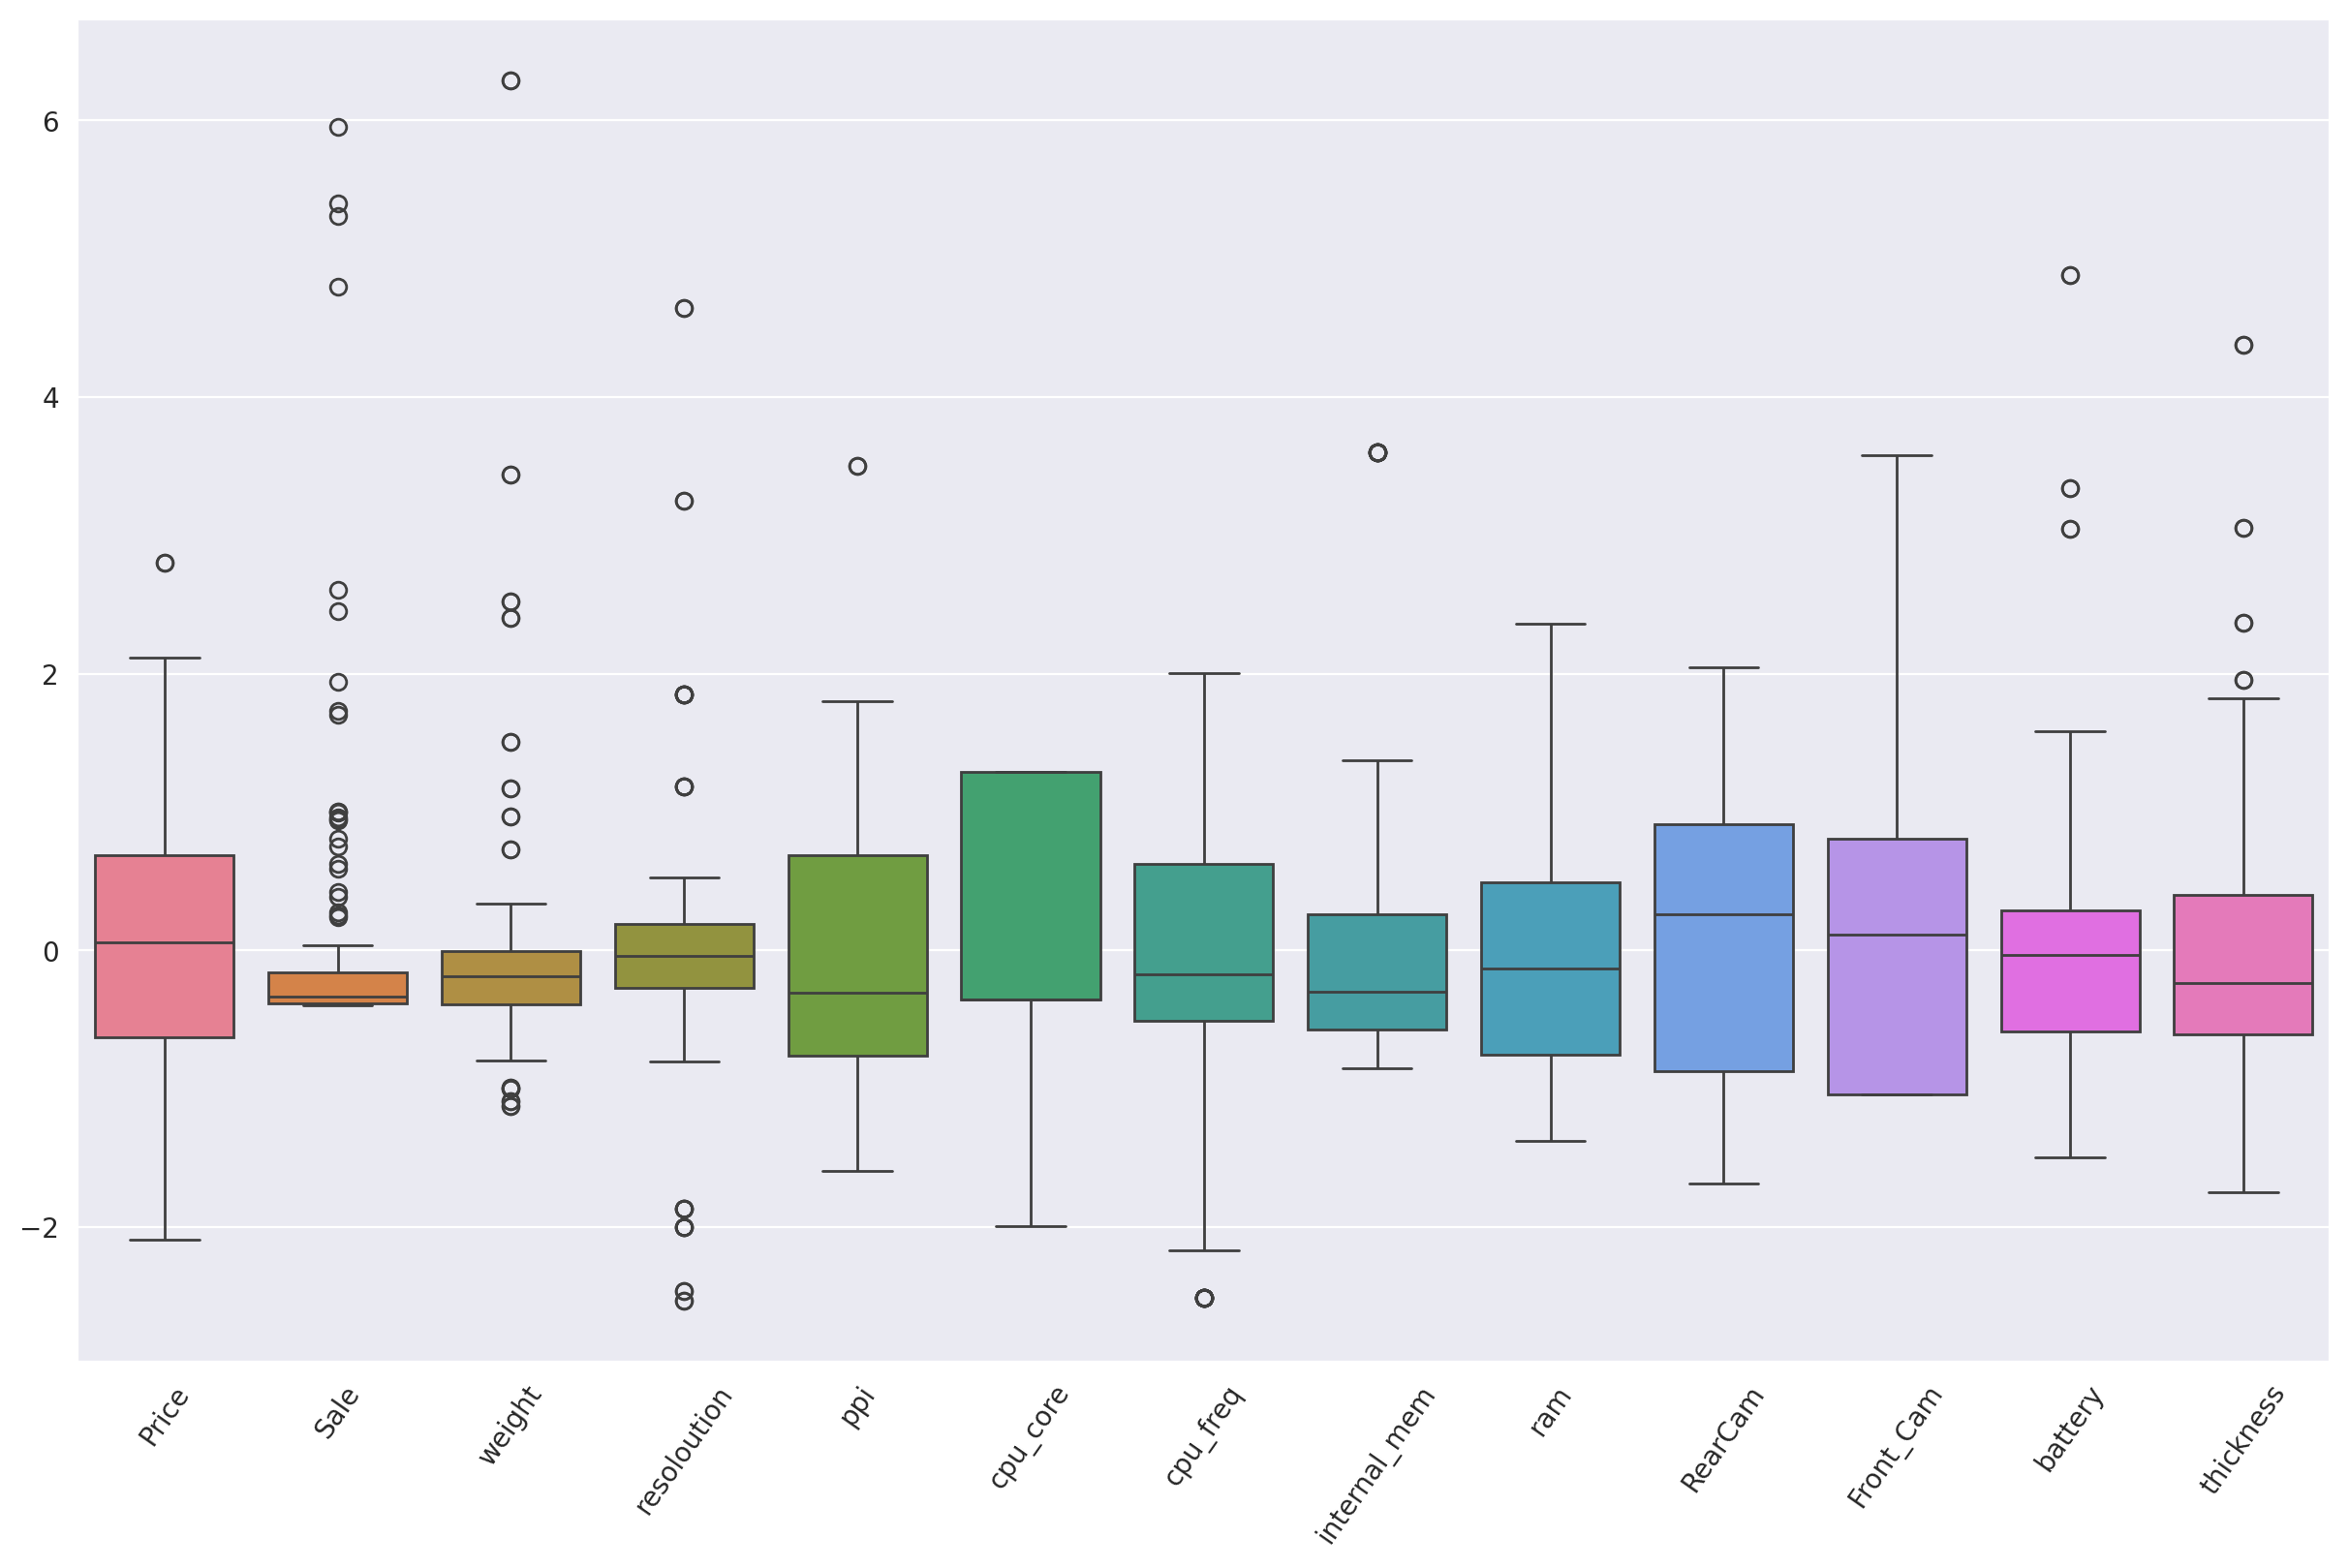

In [10]:
# Crea una instancia del objeto StandardScaler, que se utilizará para estandarizar los datos.
scaler = StandardScaler()

# Selecciona las columnas numéricas del DataFrame 'sales' y las convierte en una lista.
numerical_cols = sales.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('Product_id')

# Realiza una copia del DataFrame 'sales' para no modificar los datos originales.
copy_sales = sales.copy()

# Estandariza las columnas numéricas seleccionadas en la copia del DataFrame utilizando el objeto StandardScaler creado anteriormente.
copy_sales[numerical_cols] = scaler.fit_transform(copy_sales[numerical_cols])

sns.boxplot(data=copy_sales[numerical_cols])  # Crea un diagrama de caja (boxplot) utilizando los datos estandarizados de las columnas numéricas de 'copy_sales'.
plt.xticks(rotation=55)  # Rota las etiquetas del eje x en el gráfico para facilitar la lectura.
plt.show()  # Muestra el gráfico.


# 2. Definicion de Y e X

Es claro que nuestra **V.A objetivo** *(V.A Y dependiente)* va ser nuestra columna: "Price" y con respecto a nuestra X (V.A.s independientes)....

Bueno sera casi todas las demas V.A.s , excepcion de las siguientes:

*   **Product_id**: Es un identificador no cuantitativo del producto.
*   **Sale**: Nos menciona que tantos dispositivos se vendieron en la tienda.

Esto lo hacemos ya que por ahora queremos centrarno en ver como se esta comportando nuestro regresion por medio de los resultados *(e conclusion)* de cada supuesto *(seccion #6)...*

In [11]:
X = sales.iloc[:,3:-1]          # hacemos a X para indicar las V.A.s independientes
print(X.columns)

Y = sales.iloc[:,1]           # hacemos a Y para indicar las V.A. dependientes
print(Y)

Index(['weight', 'resoloution', 'ppi', 'cpu_core', 'cpu_freq', 'internal_mem',
       'ram', 'RearCam', 'Front_Cam', 'battery'],
      dtype='object')
0      2357
1      1749
2      1916
3      1315
4      1749
       ... 
156    3551
157    3211
158    3260
159    3211
160    2536
Name: Price, Length: 161, dtype: int64


Ya con esto podemos ver cual es el comportamiento que tienen estos 2 objetos en el siguiente apartado....

# 3. Relacion entre las variables dependientes

Veamos como es la relacion de las V.A.s de X entre si por medio de la correlación

Text(0.5, 1.0, 'Mapa de calor para nuestro dataframe')

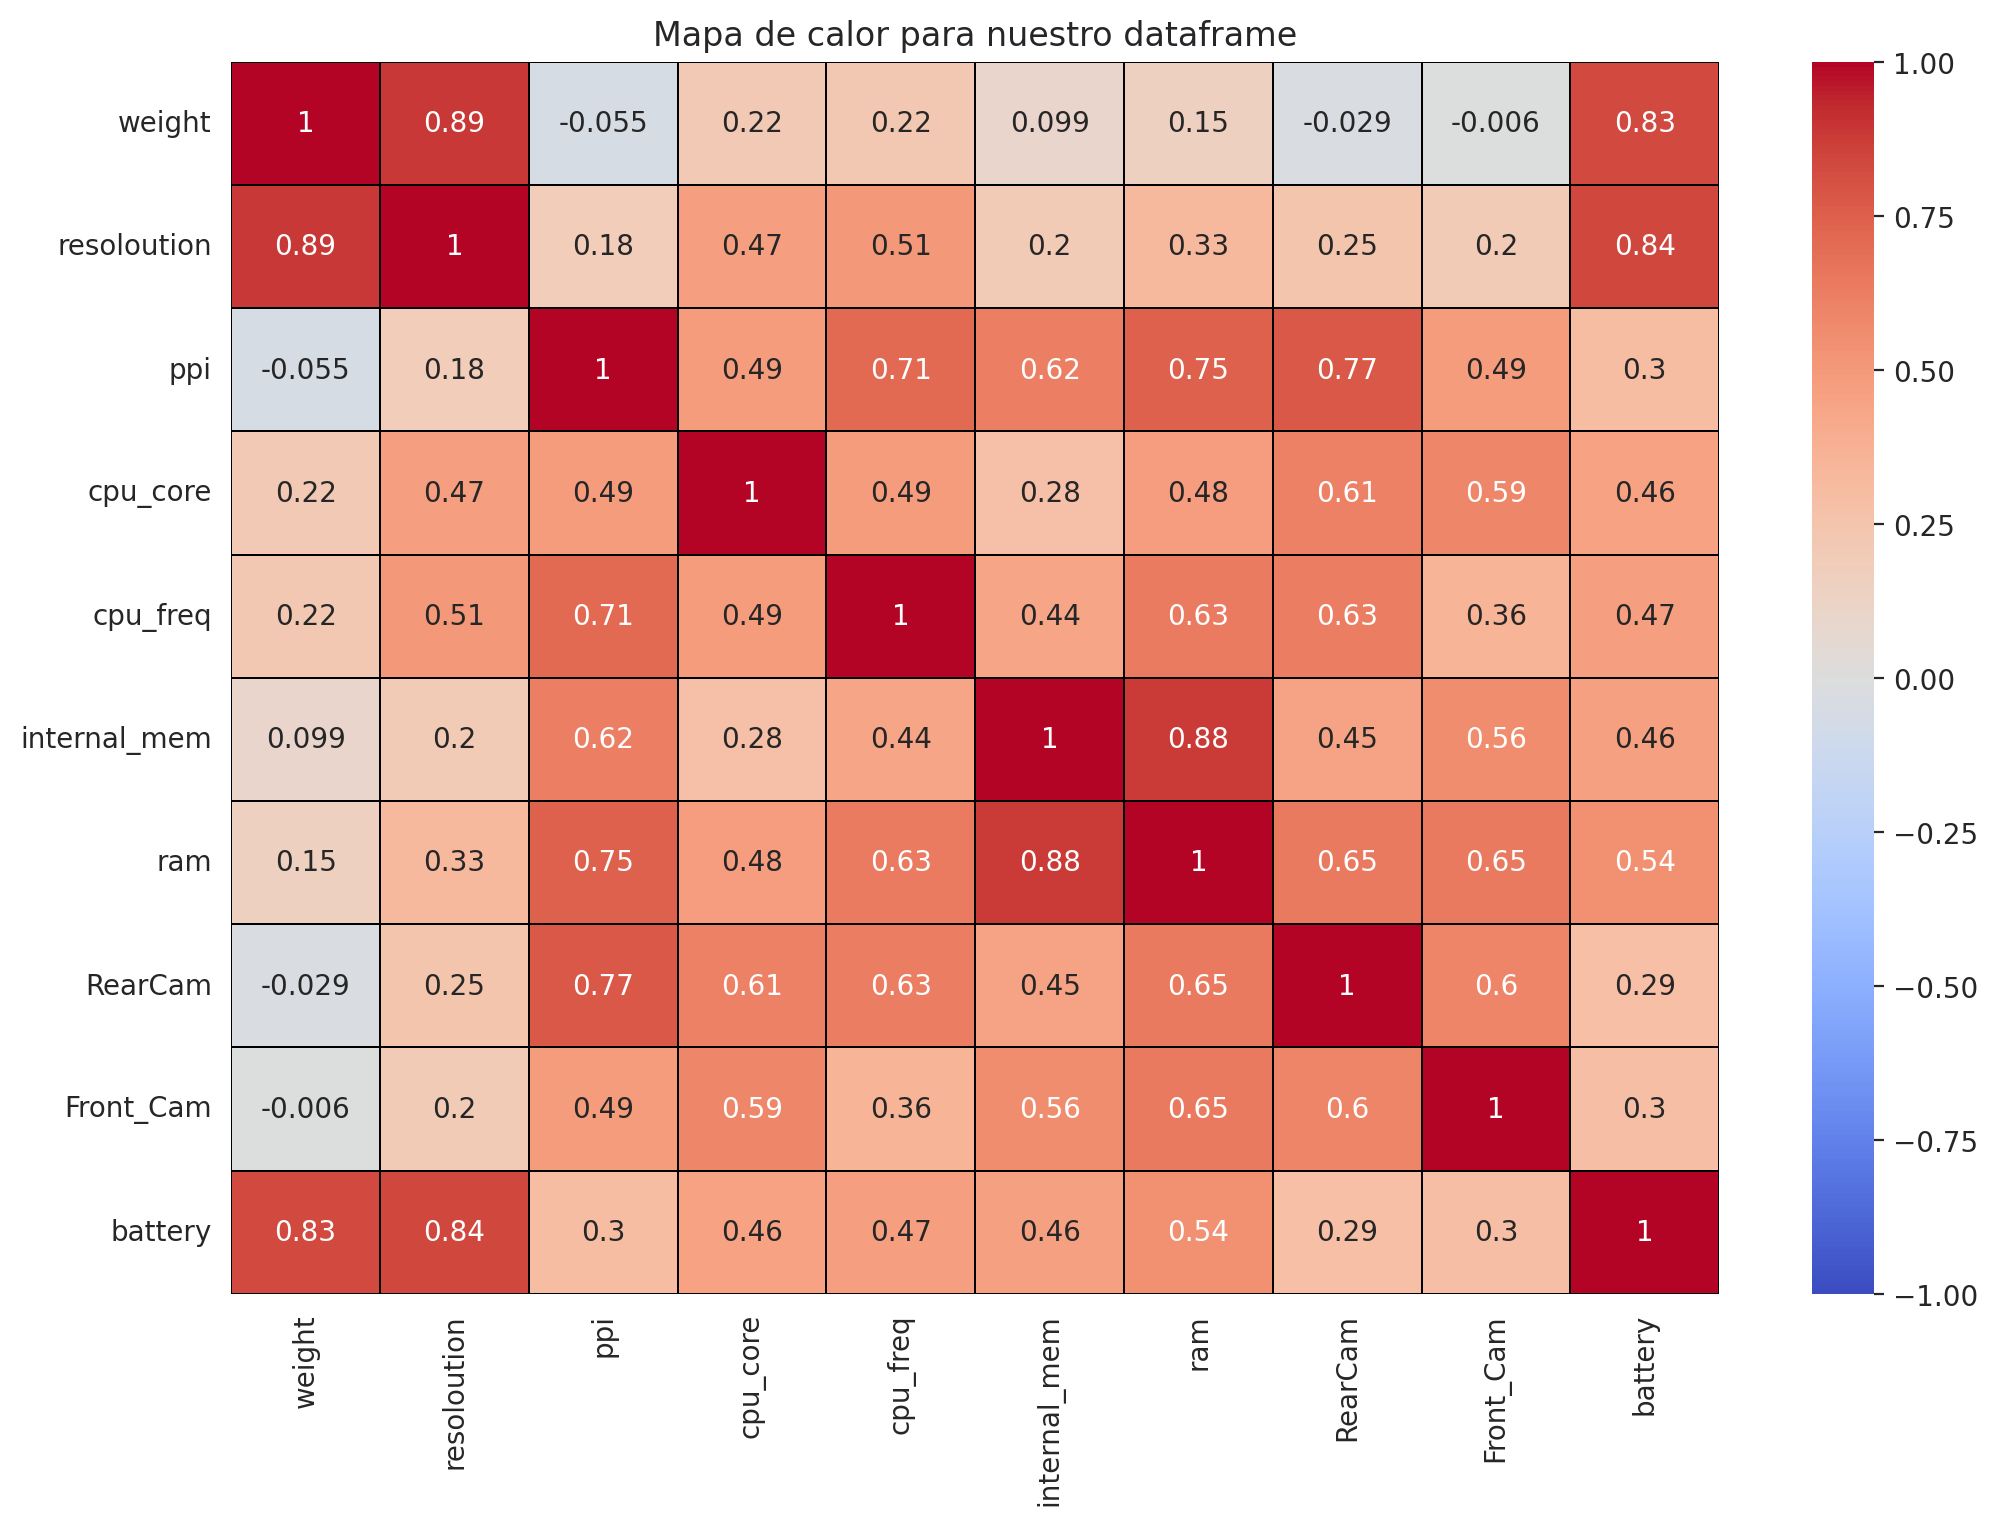

In [12]:
plt.figure(figsize=(12, 8))
grafica_calor = sns.heatmap(X.corr(),
                            annot = True,         # Colocan los valores reales dentro de cada cuadro del mapa de calor.
                            linewidths = 0.01,    # Controla el ancho de las líneas que separan los cuadros en el mapa de calor.
                            linecolor = 'black',
                            vmin = -1,            # establece el valor mínimo en el rango de colores. Aquí, se ha establecido en -1, que es el valor mínimo posible para la correlación.
                            vmax = +1,            # establece el valor máximo en el rango de colores. Aquí, se ha establecido en +1, que es el valor máximo posible para la correlación.
                            cmap = 'coolwarm'         # establece el esquema de colores a utilizar en el mapa de calor.
                            )
plt.title('Mapa de calor para nuestro dataframe')

De donde podemos observar que las variables que tienen alta correlación entre si son las variables:
*  weight y battery
*  weight y resoloution
*  resoloution y battery
*  RearCam y ppi
*  ram e internal_mem

Bajo esto podemos ver que hay una correlacion positiva entre las V.A.s entre ellas *(es decir que si una crece la otra también)* lo cual puede sesgar el modelo debido a la multicolinealidad.

In [13]:
def corr_xy(x, y):                      # definimos una funcion que contenga la formula de la correlacion clasica..
    mean_x = x.mean()
    mean_y = y.mean()
    var_x = sum((x - mean_x)**2)
    var_y = sum((y - mean_y)**2)
    return round(sum((x-mean_x)*(y-mean_y))/sqrt(var_x*var_y), 2)

var_dep = "Price"         # por otra parte para usar esta funcion definimos denuevo a "Y" e "X"
print(var_dep)

Price


In [14]:
var_indep = [x for x in sales.columns if (x != 'Product_id') and (x != 'Price') and (x != 'Sale')] #Se definen las variables independientes para predecir el precio del producto
print(var_indep)

['weight', 'resoloution', 'ppi', 'cpu_core', 'cpu_freq', 'internal_mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']


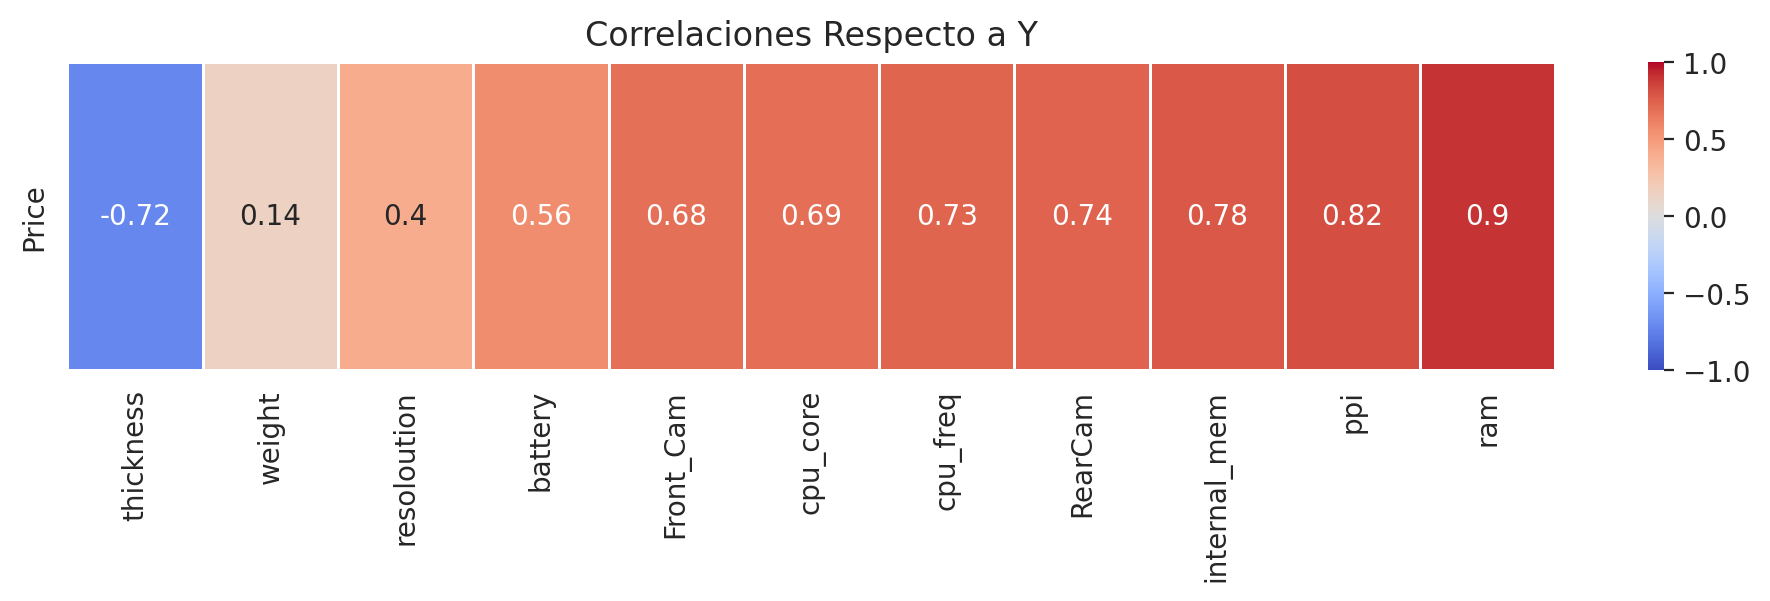

In [15]:
correlaciones_Y = pd.DataFrame()        # Crear un DataFrame vacío para almacenar las correlaciones con respecto a Y

# Iterar sobre cada V.A.s de X
for var in var_indep:
    correlaciones_Y.loc[var_dep, var] = corr_xy(sales[var_dep], sales[var])     # Calcular la correlación entre la Y e V.A. y guardar el resultado en el DataFrame.

# Transponer el DataFrame de correlaciones y ordenar las columnas deacuerdo a la correlacion calculada.
correlaciones_Y = correlaciones_Y.transpose().sort_values(by="Price").transpose()

# Para mejor presentacion haremos otra "Grafica de calor"...

plt.figure(figsize=(12,2))

sns.heatmap(data = correlaciones_Y,
            annot = True,
            cmap = "coolwarm",
            linewidth = 0.5,
            vmin = -1, vmax = 1
            )

plt.title("Correlaciones Respecto a Y")
plt.show()

Como podemos observar, existe una relación positiva entre la variable objetivo y las variables explicativas, lo cual es bueno ya que las variables explicativas aportan información para predecir la variable objetivo.

Si pasamos a observa el comportamiento de las V.A.s con respecto a Y por medio de las graficas de dispersion tenemos lo siguiente:

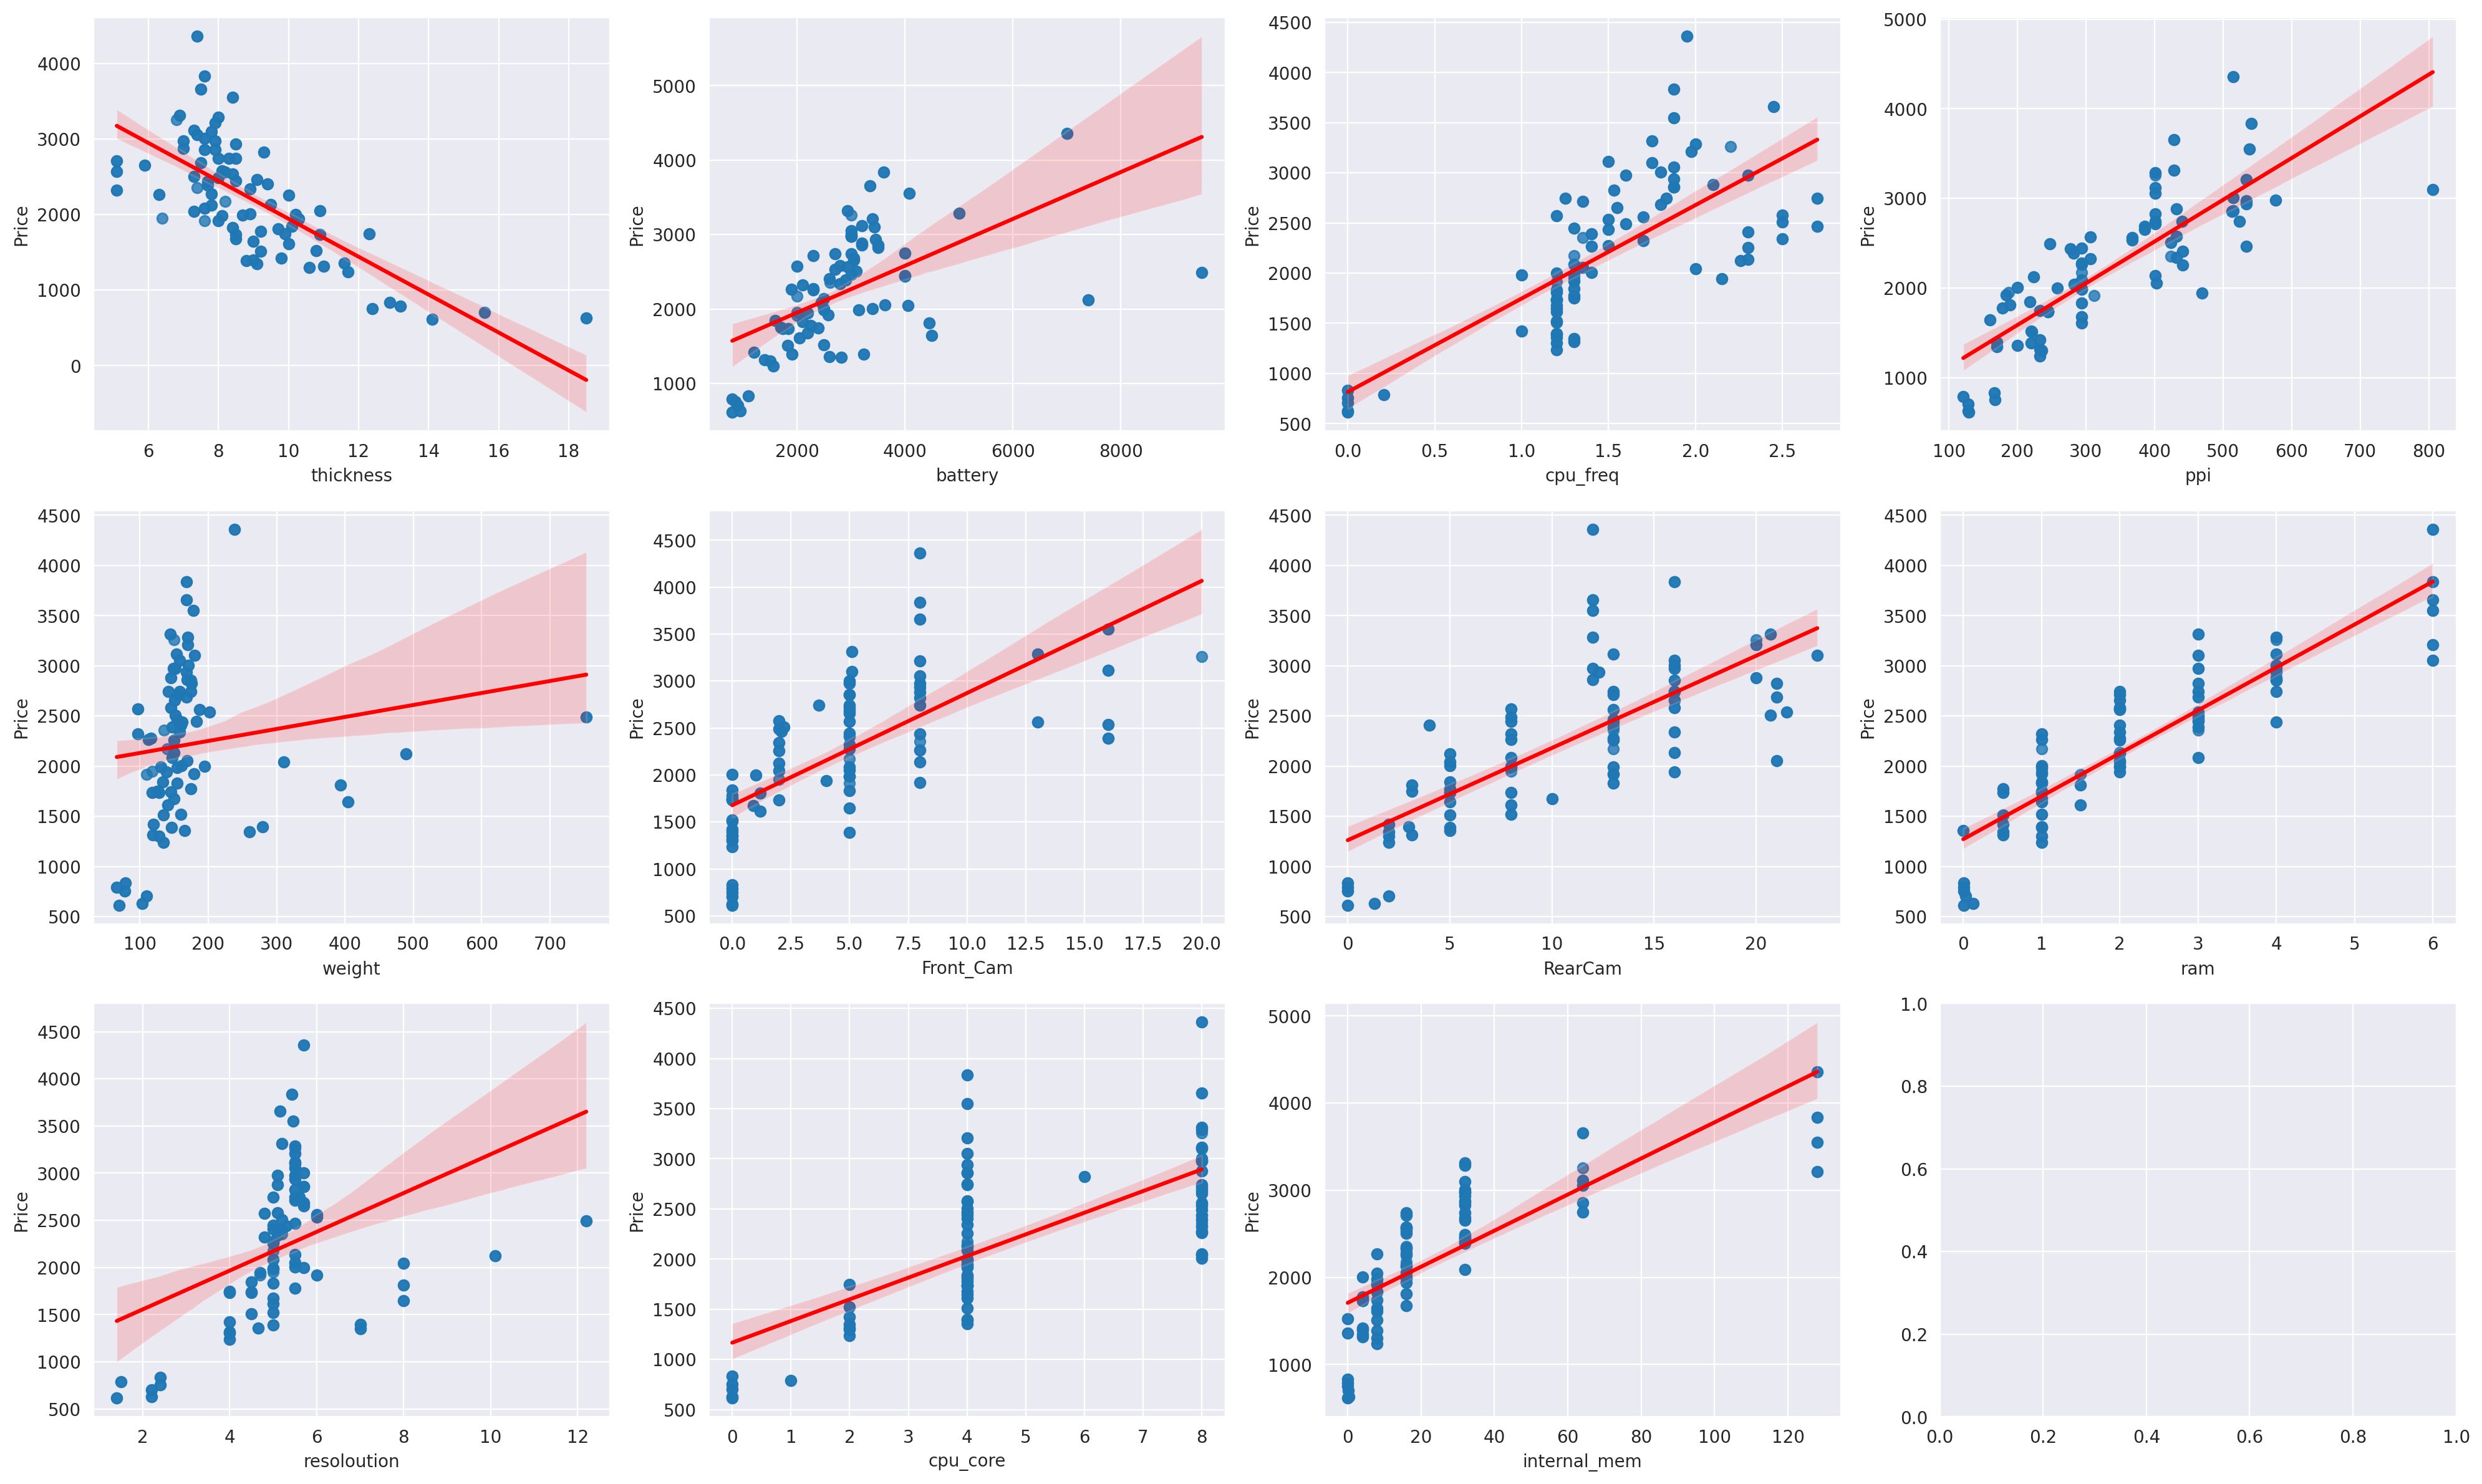

In [16]:
col_dep = "Price"                     # definimos las V.A.s y Y
col_indep = correlaciones_Y.columns.tolist()

# Crear una figura y un conjunto de ejes con 3 fila y 4 columnas, con un tamaño de figura de 20x12 pulgadas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))

i = 0
for col in range(4):
    for row in range(3):
      try:
        ax = axes[row, col]    # Obtener el eje actual

        sns.regplot(data=sales,
                    x=col_indep[i],
                    y=col_dep,
                    line_kws={"color": "red"},
                    ax=ax)    # Realizar un gráfico de dispersión entre la columna independiente actual y la columna dependiente

        ax.set_xlabel(col_indep[i])    # Establecer la etiqueta del eje x como el nombre de la columna independiente actual
        ax.set_ylabel(col_dep)    # Establecer la etiqueta del eje y como el nombre de la columna dependiente

        i += 1
      except:
        pass

plt.tight_layout()          # Ajustar el diseño para evitar superposiciones
plt.show()

Podemos observar un comportamiento lineal con las V.A.s.

Ya por ultimo otra cosa que comumente se pide antes de realizar la regresion es ver si nuestra V.A objetivo tiene un comportamiento de Normal; para ello solo nos guiaremos por medio del un hisotgrama y por supuesto la funcion de densidad que se ajuste al histograma anterior.

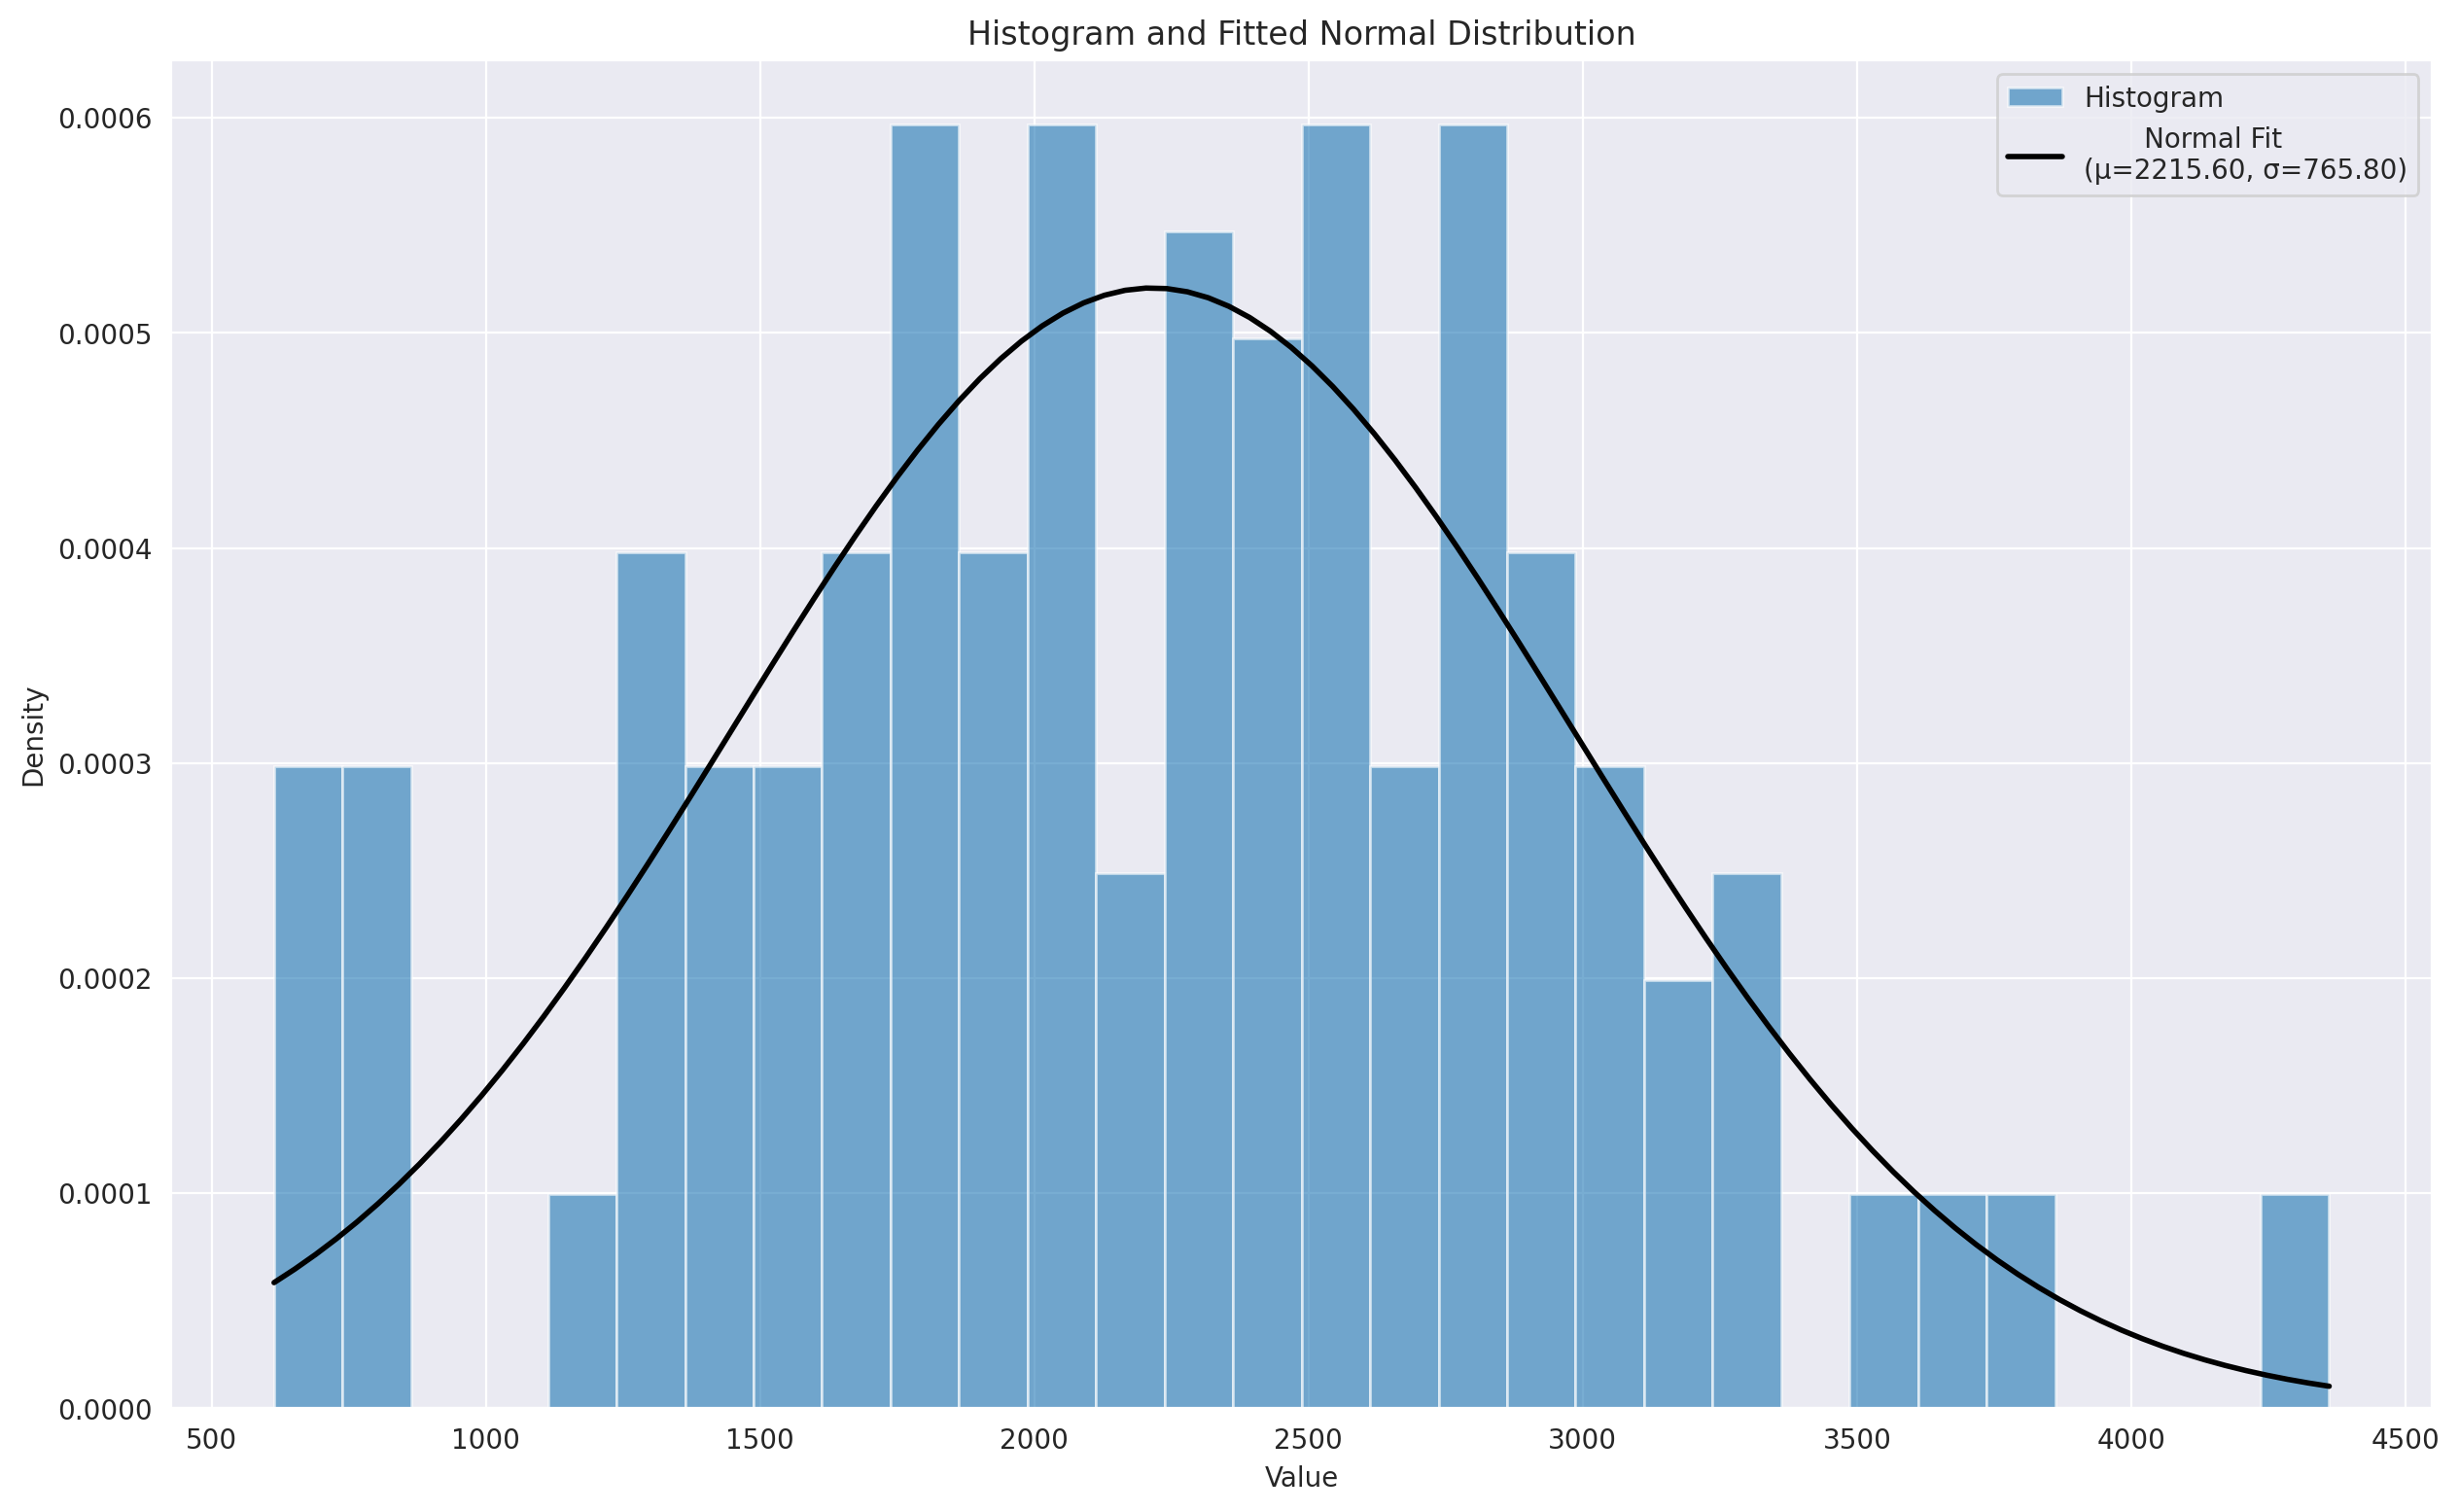

In [17]:
# Crear un histograma para la columna 'Price' del DataFrame sales
plt.hist(x=sales["Price"], bins=30, density=True, alpha=0.6, label='Histogram')

# Calcular el número de muestras, la media y la desviación estándar de la columna 'Price'
n = sales.shape[0]    # Número de muestras
mu = sales["Price"].mean()    # Media
sigma = sqrt(sum((sales["Price"] - sales["Price"].mean()) ** 2) / n)    # Desviación estándar

# Crear un rango de valores para x y calcular la distribución normal correspondiente
x = np.linspace(sales["Price"].min(), sales["Price"].max(), 100)
p = norm.pdf(x, mu, sigma)

# Graficar la distribución normal ajustada
plt.plot(x, p, 'k', linewidth=2, label=f"{' '*7}Normal Fit\n(μ={mu:.2f}, σ={sigma:.2f})")

# Establecer el título del gráfico
plt.title('Histogram and Fitted Normal Distribution')

# Establecer etiquetas de los ejes x e y
plt.xlabel('Value')
plt.ylabel('Density')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


Aunque la variable objetivo no necesariamente sigue la curva, debido a la concentración de los datos y valores atípicos *(como se veía en el gráfico de boxplot al inicio)* podemos obsevar un comportamiento de una distribución normal con $ \mu = 2215.60 $ y $ \sigma = 765.80 $

# 4. Regresión Múltiple e Interpretacion del summery

A continuación utilizaremos el método de **OLS** *(Minimimos Cuadrados Ordinarios)* para realizar nuestro modelo de Regresión Lineal y corrobar que se cumplan los supuestos.

In [18]:
X_constant = sm.add_constant(X)     # hacemos que haga la columna de "1" a nuestra X para nuestro trabajo
lin_reg = sm.OLS(Y, X_constant).fit()        # realizamos el modelo de "minimizacion de cuadrados ordinarios"
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     242.1
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           3.36e-87
Time:                        01:50:03   Log-Likelihood:                -1068.9
No. Observations:                 161   AIC:                             2160.
Df Residuals:                     150   BIC:                             2194.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          519.0070     82.620      6.282   

**La Primera Seccion** del summery nos indica cierto valores:

* **Dep. Variable**: Nombre de la variable dependiente, en nuestro caso Price es nuestra variable objetivo.

* **Model**: Indica el modelo utilizado, Ordinary Least Squares.

* **No. Observations**: Cantidad observaciones que tenemos en el dataset; estamos contando con 161 observaciones.

* **Df Residuals**: Grados de libertad de los residuos es lo calculamos como $df = N - (c + 1)$ y tenemos que es de 150.

* **Df Model**: Grados de libertad de modelos que es el # de V.A.s que conforman a X y tenemos que son 10.

*  **R-squared**: Es el $ R^2 $ que nos indica la eficiencia de nuestro modelo *(aunque no sea totalmente cierto)* y se puede expresar como: $ R^2 = SS_{residuos} / SS_{Total} $ y tenemos que es de .942 *(lo cual es "un buen modelo")*.

* **AIC y BOC**: son criterios de información que penalizan el modelo por el número de variables. Se prefieren valores más bajos, lo que indica un mejor equilibrio entre el ajuste del modelo su complejidad.

* **Log-Likehood**: es el logaritmo de la función de verosimilitud, que mide la adecuación del modelo a los datos. Un valor más alto indica un mejor ajuste.

Continuando con **la Segunda Seccion** del summery tenemos un listado de nuestras V.A.s X que nos devuelve los valores siguiente..


* **coef**: Son los coeficientes estimados $ B_i $ de cada V.A.s *(con esto podemos formar **la ecuacion de regresion**)*

* **t**: Es el estadistico "t-students" que se conforma como: $coef / standar error $ que nos ayuda a determinar el sig. termino...

* **P-values**: Nos indica la significancia estadística de cada coeficiente estimado (es la probabilidad de que el $B_i$ sea igual a 0) establecido por una prueba de hipotesis. Si $ P-Value < .05 $ podemos decier que es: "significativa el $B_i$"

* **Intervalos de confianza**: Son las ultimas 2 columnas que estable que posible valores toma los coeficientes estimados.

Podemos dictaminar que las V.A.s: "RearCam" y "Front_Cam" no son significativas; por ello no lo podemos contemplar en nuestra regresion (tanto por el P-Value y el intervalo_confianza).


Dejando un lado **La Tercera Seccion** del summery *(estos terminos lo vemos mas adelante)*; veamos a que nos indica las notas que son detalles a tomar en cuenta...

1. **Standard Errors assume that the covariance matrix of the errors is correctly specified**: Esta nota indica que los errores estándar están calculados bajo la suposición de que la matriz de covarianza de los errores está correctamente especificada. Esto es importante porque los errores estándar incorrectos pueden afectar la validez de las pruebas de hipótesis y los intervalos de confianza asociados con los coeficientes del modelo.

2. **The condition number is large, 1.23e+03. This might indicate that there are strong multicollinearity or other numerical problems**: Esta nota sugiere que el número de condición de la matriz de diseño del modelo es grande, lo que puede indicar la presencia de multicolinealidad fuerte o problemas numéricos. Un alto número de condición puede dificultar la estimación precisa de los coeficientes del modelo y puede afectar la estabilidad numérica del modelo. Si hay multicolinealidad, podría ser necesario abordarla mediante técnicas como la eliminación de variables redundantes o el uso de métodos de regularización.

# 5. Revisión de los Supuesto de la regresion multiple

Pero es claro que apesar de haber desarrollado el modelo de regresion multiple no podemos tomar todos estos resultados como validos ya que no hemos visto (o revisado) los supuestos que debe cumplir para mejor la eficiencia de nuestra regresion...

## Supuesto de Linealidad o Multicolinealidad

In [19]:
def linearity_test(model, y):

    fitted_vals = model.predict()       # creamos lo input del modelo y Y
    resids = model.resid

    fig, ax = plt.subplots(1, 2)      # Creamos una grafica

    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})     # una grafica va ser de los datos de entrenamiento
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})        # una grafica va ser de los datos de test
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')

    plt.show()

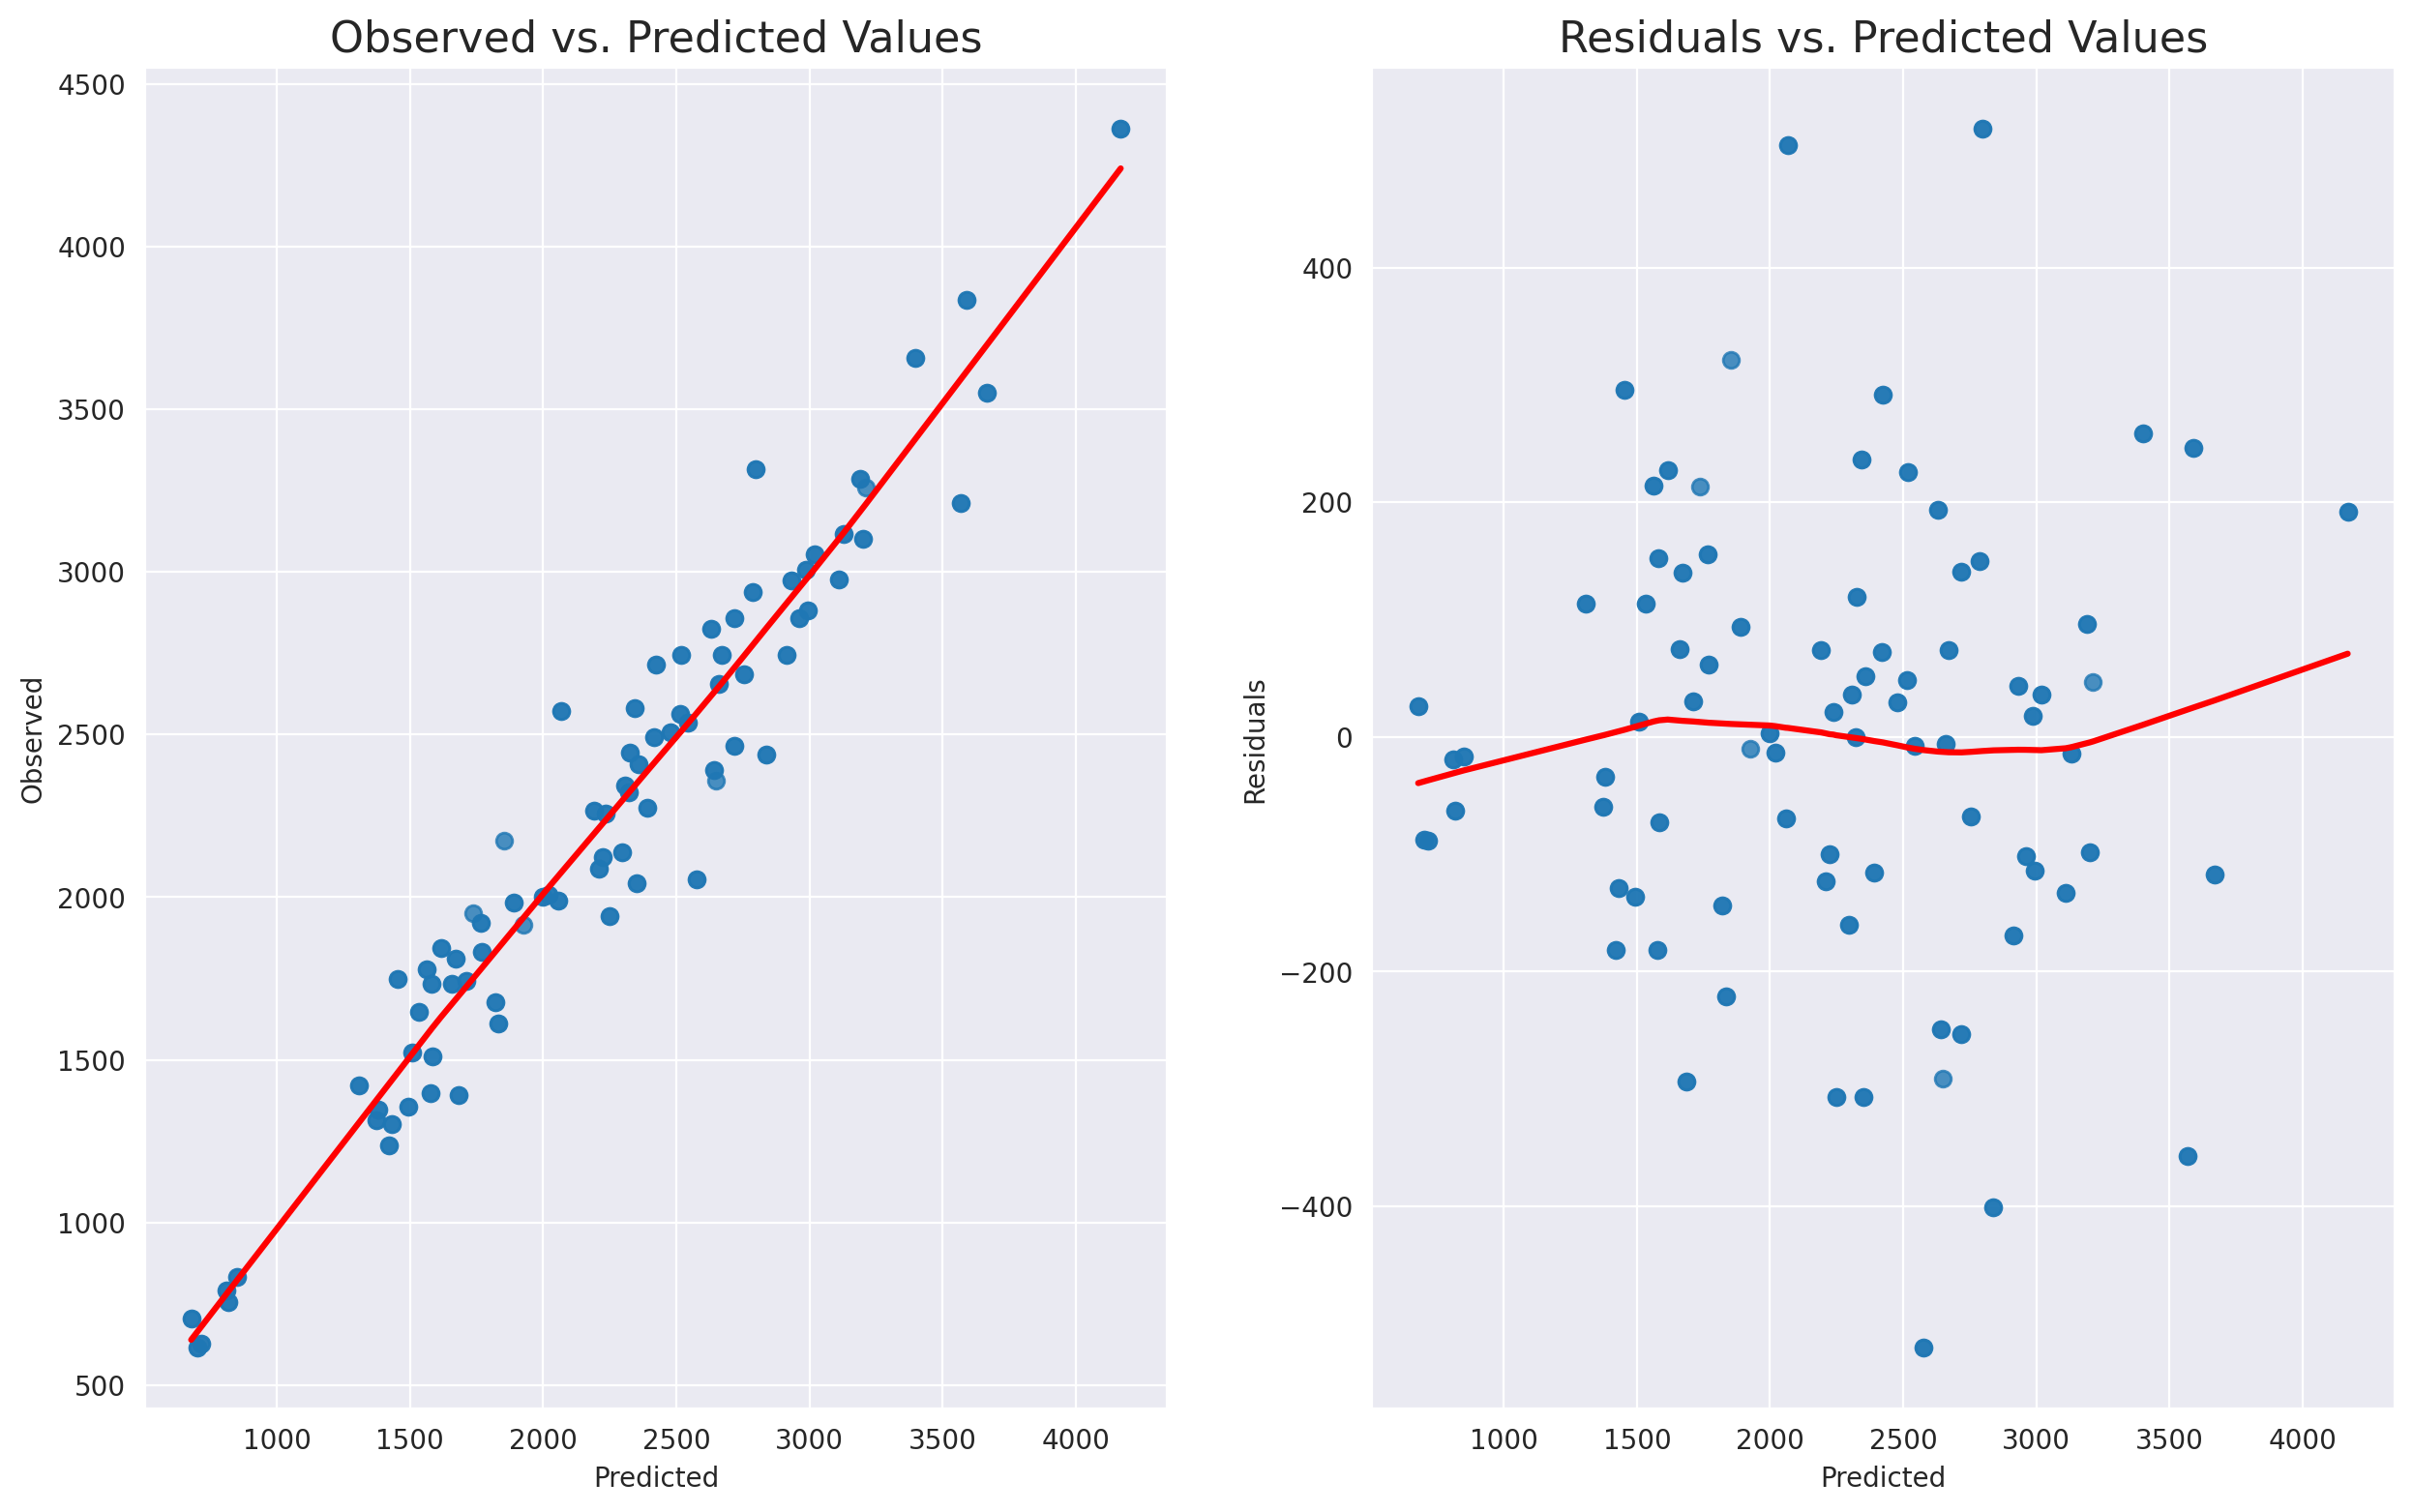

In [20]:
linearity_test(lin_reg, sales["Price"])

El ajuste parece ser bueno, ya que la mayoría de los puntos están cerca de la línea roja, lo cual es consistente con el alto R-squared
esto sugiere que el modelo tiene un poder predictivo bastante fuerte.

Una alternativa para detectar la multicolinealidad de los datos es por medio del **"Variance Inflation factor"**  [Mas informacion](https://es.wikipedia.org/wiki/Factor_de_inflaci%C3%B3n_de_la_varianza)

In [21]:
 # Importa la función variance_inflation_factor del módulo statsmodels.stats.outliers_influence.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecciona todas las columnas excepto "Product_id", "Sale" y "Price" del DataFrame 'sales' y las guarda en la lista col_indep.
col_indep = [x for x in sales.columns if x not in ("Product_id", "Sale", "Price")]
print("Variables explicativas: "+", ".join(col_indep), "\n")  # Imprime las variables explicativas separadas por comas.

# Añade una columna de unos como constante a las variables independientes en el DataFrame 'sales[col_indep]' utilizando sm.add_constant de statsmodels.
X_constant = sm.add_constant(sales[col_indep])

# Calcula el factor de inflación de la varianza (VIF) para cada variable independiente en X_constant.
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
# Creamos una variable para ejecutar la funcion sobre nuestra X_Constant

# Crea un DataFrame con los valores de VIF, excluyendo la constante, y transpone el DataFrame para que las variables estén en las filas y los VIF en las columnas.
pd.DataFrame({'vif': vif[1:]}, index=X_constant.columns.tolist()[1:]).T

Variables explicativas: weight, resoloution, ppi, cpu_core, cpu_freq, internal_mem, ram, RearCam, Front_Cam, battery, thickness 



,weight,resoloution,ppi,cpu_core,cpu_freq,internal_mem,ram,RearCam,Front_Cam,battery,thickness
vif,21.544815,21.895072,4.617944,3.093643,3.87927,5.745072,9.047228,3.630452,2.509587,9.004813,4.074913


La mayoria de los **VIF** nos arroja valores que bajo los criterios de analisis nos indica una correlacion de demasiado multicolinealidad y por ello vamos a descartarlas.

Antes de esta accion; pero algo que no hemos revisado es la V.A.s de X sean linealmente independiente y es posible que este causando la multicolinealidad que no deseamos para ello vamos a realizar lo siguiente:

In [22]:
# Define una función para verificar la independencia lineal de un conjunto de vectores en una matriz.
def independencia_lineal(A, vectores: tuple):
    n = len(vectores)
    matrix = A[list(vectores)].iloc[:n, :n].values  # Selecciona la submatriz de A según los vectores proporcionados.
    rows, cols = matrix.shape  # Obtiene el número de filas y columnas de la submatriz.
    rows = tuple(i for i in range(rows))  # Crea una tupla con los índices de las filas.
    cols = tuple(i for i in range(cols))  # Crea una tupla con los índices de las columnas.
    for col in cols:  # Itera sobre las columnas.
        for row in rows[col:]:  # Itera sobre las filas a partir de la columna actual.
            if row == col:  # Si la fila es igual a la columna actual.
                matrix[row] = matrix[row]/matrix[row, col]  # Normaliza la fila actual.
                vector = matrix[row]  # Almacena el vector normalizado.
            else:
                matrix[row] = vector*(-matrix[row, col]) + matrix[row]  # Realiza la operación de eliminación gaussiana.
    if all(matrix[i,i] == 1 for i in range(n)):  # Comprueba si todos los elementos diagonales son 1.
        return True  # Devuelve True si los vectores son linealmente independientes.
    else:
        return False  # Devuelve False si los vectores no son linealmente independientes.


In [ ]:
# Selecciona todas las columnas de 'sales' excepto "Price", "Product_id" y "Sale" y guarda el resultado en A.
A = sales[[x for x in sales.columns if x not in ("Price", "Product_id", "Sale")]]
# Genera todas las combinaciones posibles de 5 columnas de A.
combinations = itertools.combinations(A.columns, 5)

# Inicializa una variable para contar el número total de combinaciones.
N = 0
# Inicializa una lista para almacenar las combinaciones que resultan en vectores linealmente independientes.
good_combinations = []

# Itera sobre todas las combinaciones generadas.
for combination in combinations:
    N += 1
    # Verifica si la combinación actual de columnas de A es linealmente independiente.
    if independencia_lineal(A, combination):
        # Si la combinación es linealmente independiente, la añade a la lista de buenas combinaciones.
        good_combinations.append(combination)

# Define la columna dependiente para el modelo de regresión lineal.
col_dep = "Price"
# Inicializa una lista para almacenar los resultados de los modelos de regresión lineal.
v = []

# Itera sobre todas las buenas combinaciones de columnas.
for combination in good_combinations:
    # Crea la expresión de la fórmula para el modelo de regresión lineal.
    expresion = col_dep + " ~ " + " + ".join(combination)
    # Ajusta un modelo de regresión lineal utilizando la fórmula especificada y los datos de 'sales'.
    model = smf.ols(formula=expresion, data=sales).fit()
    # Guarda la combinación actual y el número de condición del modelo en la lista v.
    v.append((combination, model.condition_number))


In [24]:
print("Se encontraron", len(good_combinations), "combinaciones de un total de", N)

Se encontraron 70 combinaciones de un total de 462


In [25]:
# Establece el umbral de tolerancia para el número de condición del modelo.
tolerancia = 700
# Crea un DataFrame utilizando solo las combinaciones cuyo número de condición es menor que la tolerancia especificada.
combinations = pd.DataFrame(data=[x for x in v if x[1]<tolerancia],
                            columns=("combination", "condition_number")).sort_values(by="condition_number", ascending=False)

*  La funcion "independencia lineal" tiene el objetivo de ver una combinancion con baja multicolinealidad para extraer 5 V.A.s para volver a ejecutar de nuevo la regresion y tener buenos resultados y supuestos

In [26]:
# Define la columna dependiente para el modelo de regresión lineal.
col_dep = "Price"
# Obtiene las columnas independientes de la primera combinación en el DataFrame 'combinations'.
col_indep = list(combinations.iloc[0, 0])


In [27]:
# Construye la expresión de la fórmula para el modelo de regresión lineal.
expresion = col_dep + " ~ " + " + ".join(col_indep)
# Imprime la expresión de la fórmula para el modelo de regresión lineal.
expresion

'Price ~ weight + cpu_core + cpu_freq + ram + Front_Cam'

volvemos a ejecutar el modelo pero con las 5 V.A.s y la Y que habiamos usado

In [28]:
# Ajusta un modelo de regresión lineal utilizando la fórmula especificada y los datos de 'sales'.
model = smf.ols(formula=expresion, data=sales).fit()

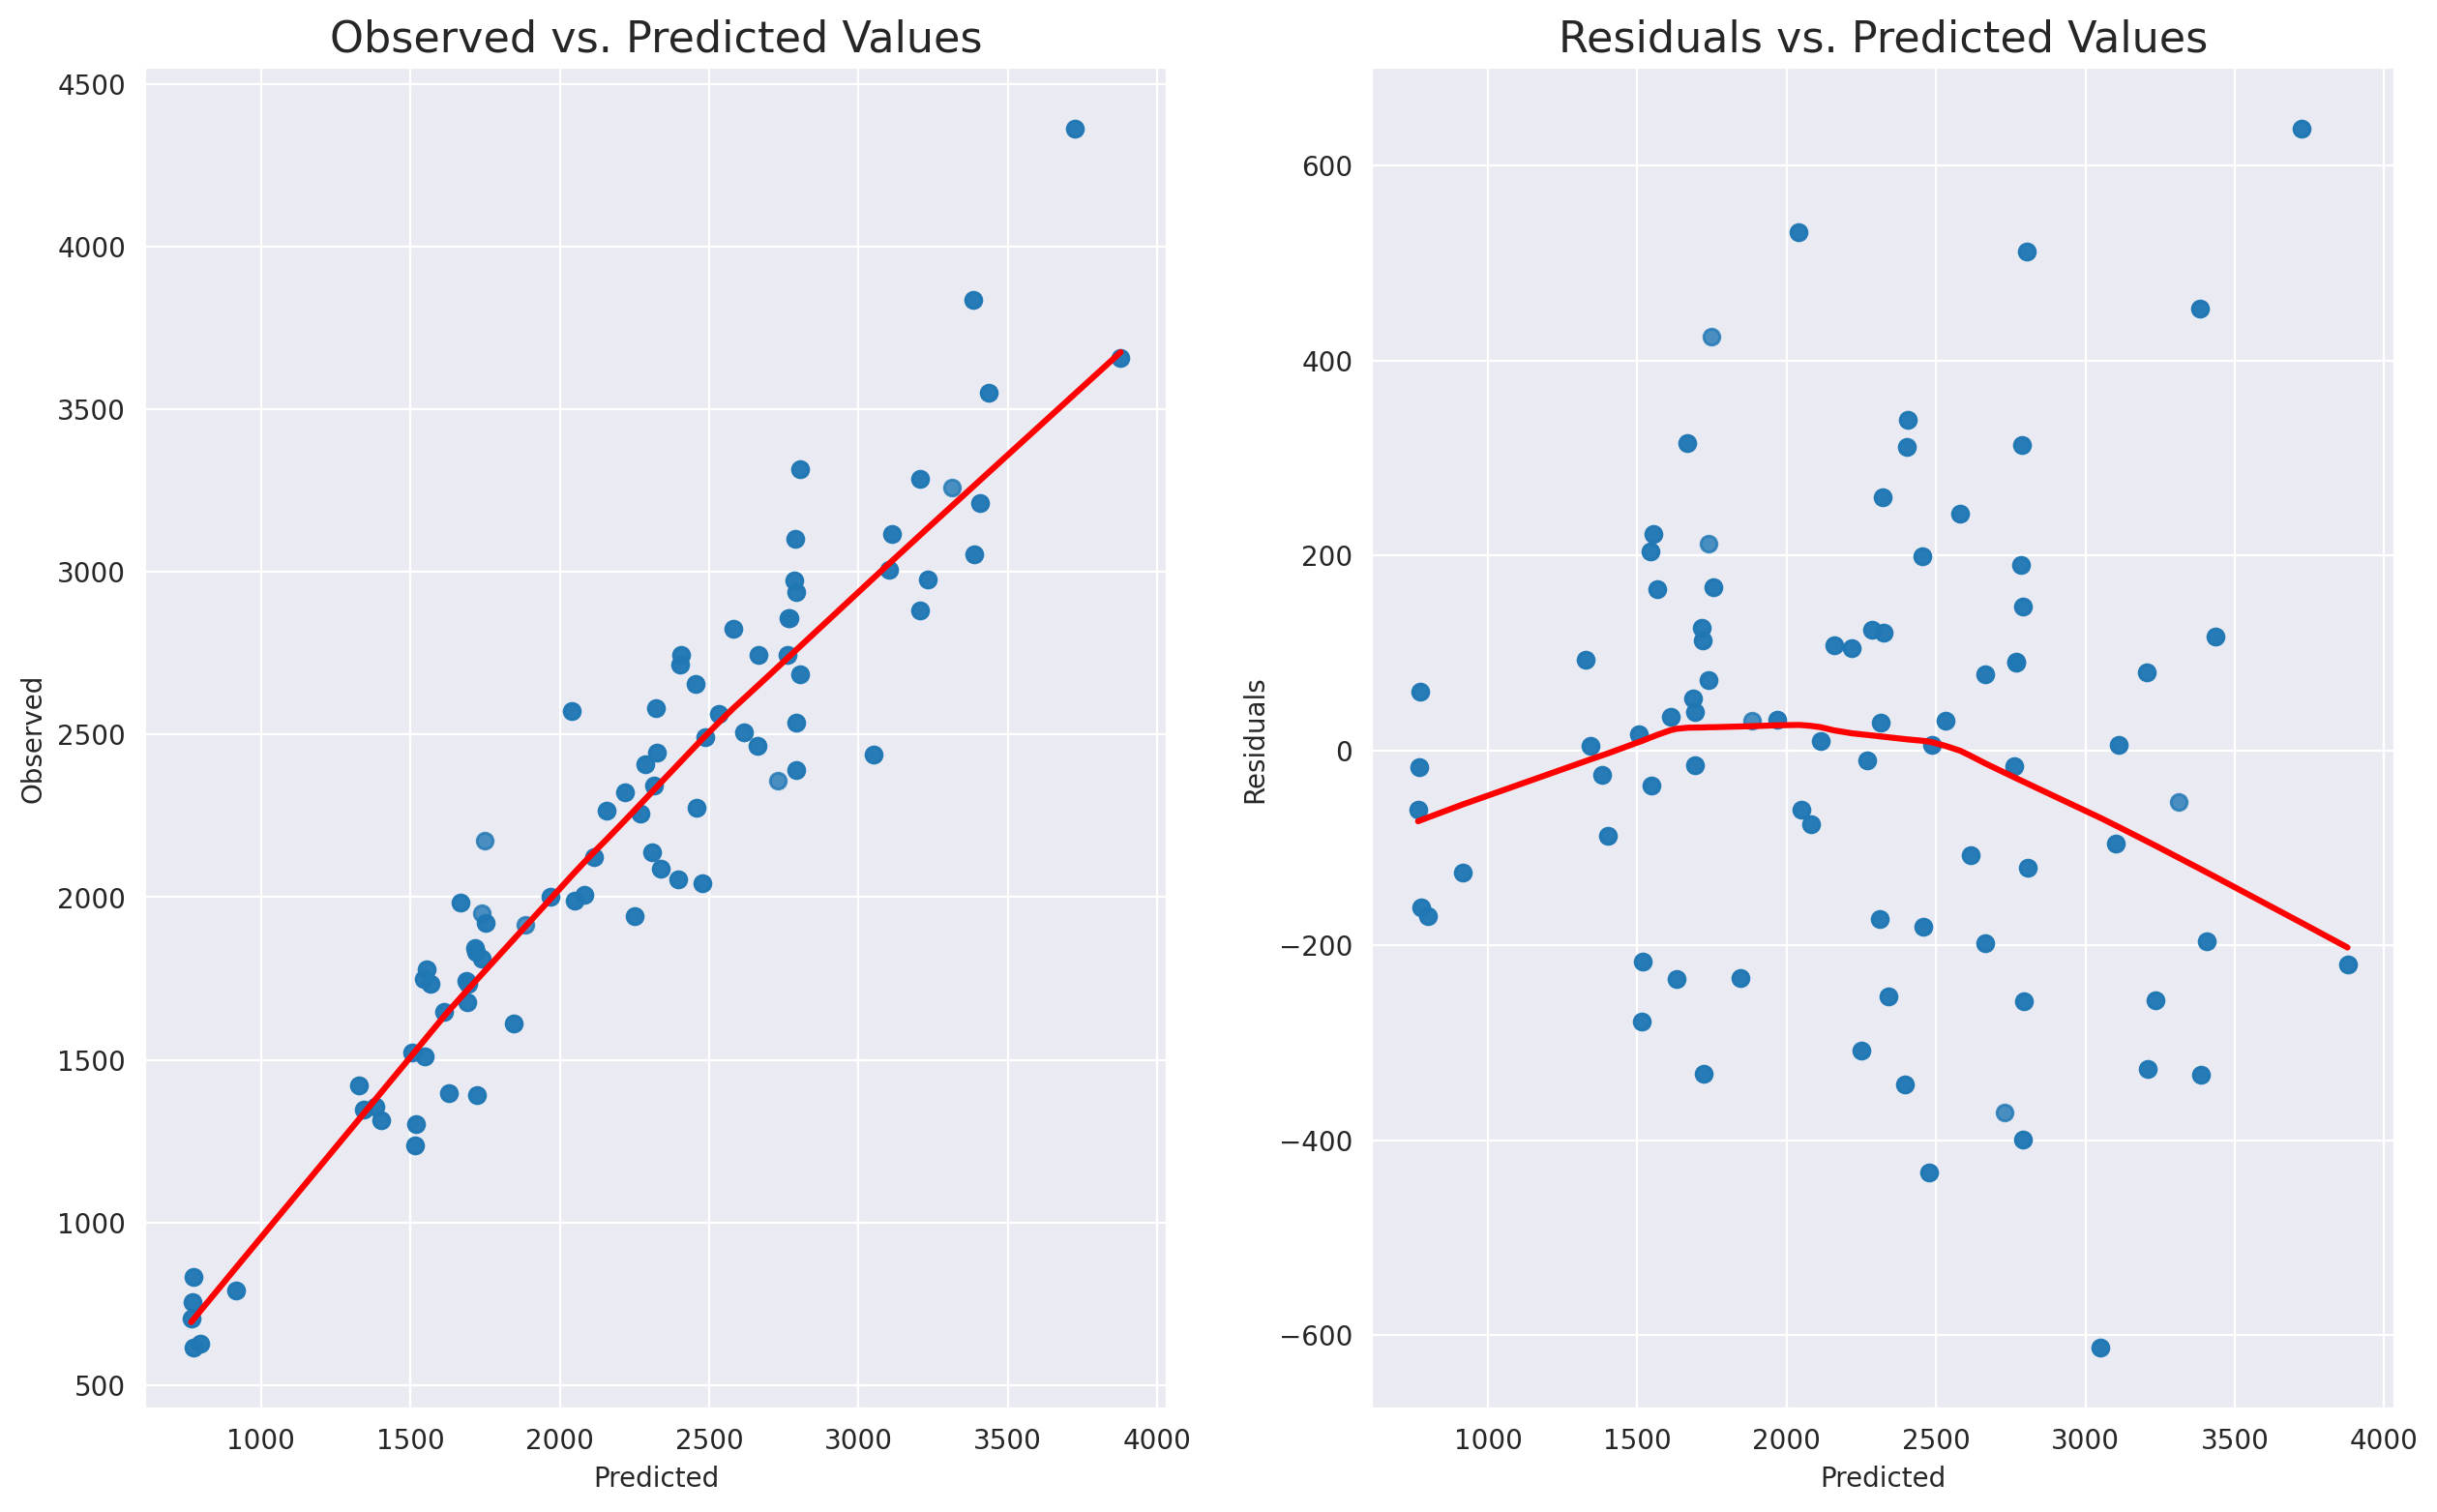

In [29]:
# Realiza una prueba de linealidad para el modelo ajustado utilizando la función linearity_test.
linearity_test(model, sales["Price"])

Observemos una mejora abismal de las graficas de *observaciones Vs predicciones* e *observaciones Vs predicciones* en comparaciones a las graficas inicales y si observamos los **VIF**....

In [30]:
# Importa la función variance_inflation_factor del módulo statsmodels.stats.outliers_influence.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Imprime las variables explicativas separadas por comas.
print("Variables explicativas: "+", ".join(col_indep))

# Añade una columna de unos como constante a las variables independientes en el DataFrame 'sales[col_indep]'.
X_constant = sm.add_constant(sales[col_indep])

# Calcula el factor de inflación de la varianza (VIF) para cada variable independiente en X_constant.
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

# Crea un DataFrame con los valores de VIF, excluyendo la constante, y transpone el DataFrame para que las variables estén en las filas y los VIF en las columnas.
pd.DataFrame({'vif': vif[1:]}, index=X_constant.columns.tolist()[1:]).T


Variables explicativas: weight, cpu_core, cpu_freq, ram, Front_Cam


,weight,cpu_core,cpu_freq,ram,Front_Cam
vif,1.116645,1.855115,1.917784,2.557267,2.280736


Las 5 V.A.s no cuenta con casi nula multicolinealidad generada y si vemos los cambio que genera esto en el summery; apesar de que $R^2$ disminuyo pero podemos decir que 4 V.A.s son significativas *("from_cam" no lo es)*.

Se puede observar que en comparación con el anterior summary que se ha eliminado la multicolinealidad.

In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     310.8
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           7.54e-79
Time:                        01:50:07   Log-Likelihood:                -1104.4
No. Observations:                 161   AIC:                             2221.
Df Residuals:                     155   BIC:                             2239.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    803.5919     58.079     13.836      0.0

## Supuesto de Homocedasticidad

Observemos gráficamente los residuos y los residuos normalizados frente a los valores ajustados y analicemos las pruebas de Breusch-Pagan y Goldfeld-Quandt para comprobar la homocedasticidad de los residuos en un modelo de regresión lineal.

In [32]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'         # importamos algunas paqueterias nuestra funcion
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)


 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  3.655492e+01
p-value                        7.354784e-07
f-value                        9.106045e+00
f p-value                      1.301997e-07

 Goldfeld-Quandt test ----
                value
F statistic  0.665531
p-value      0.959421

 Residuals plots ----


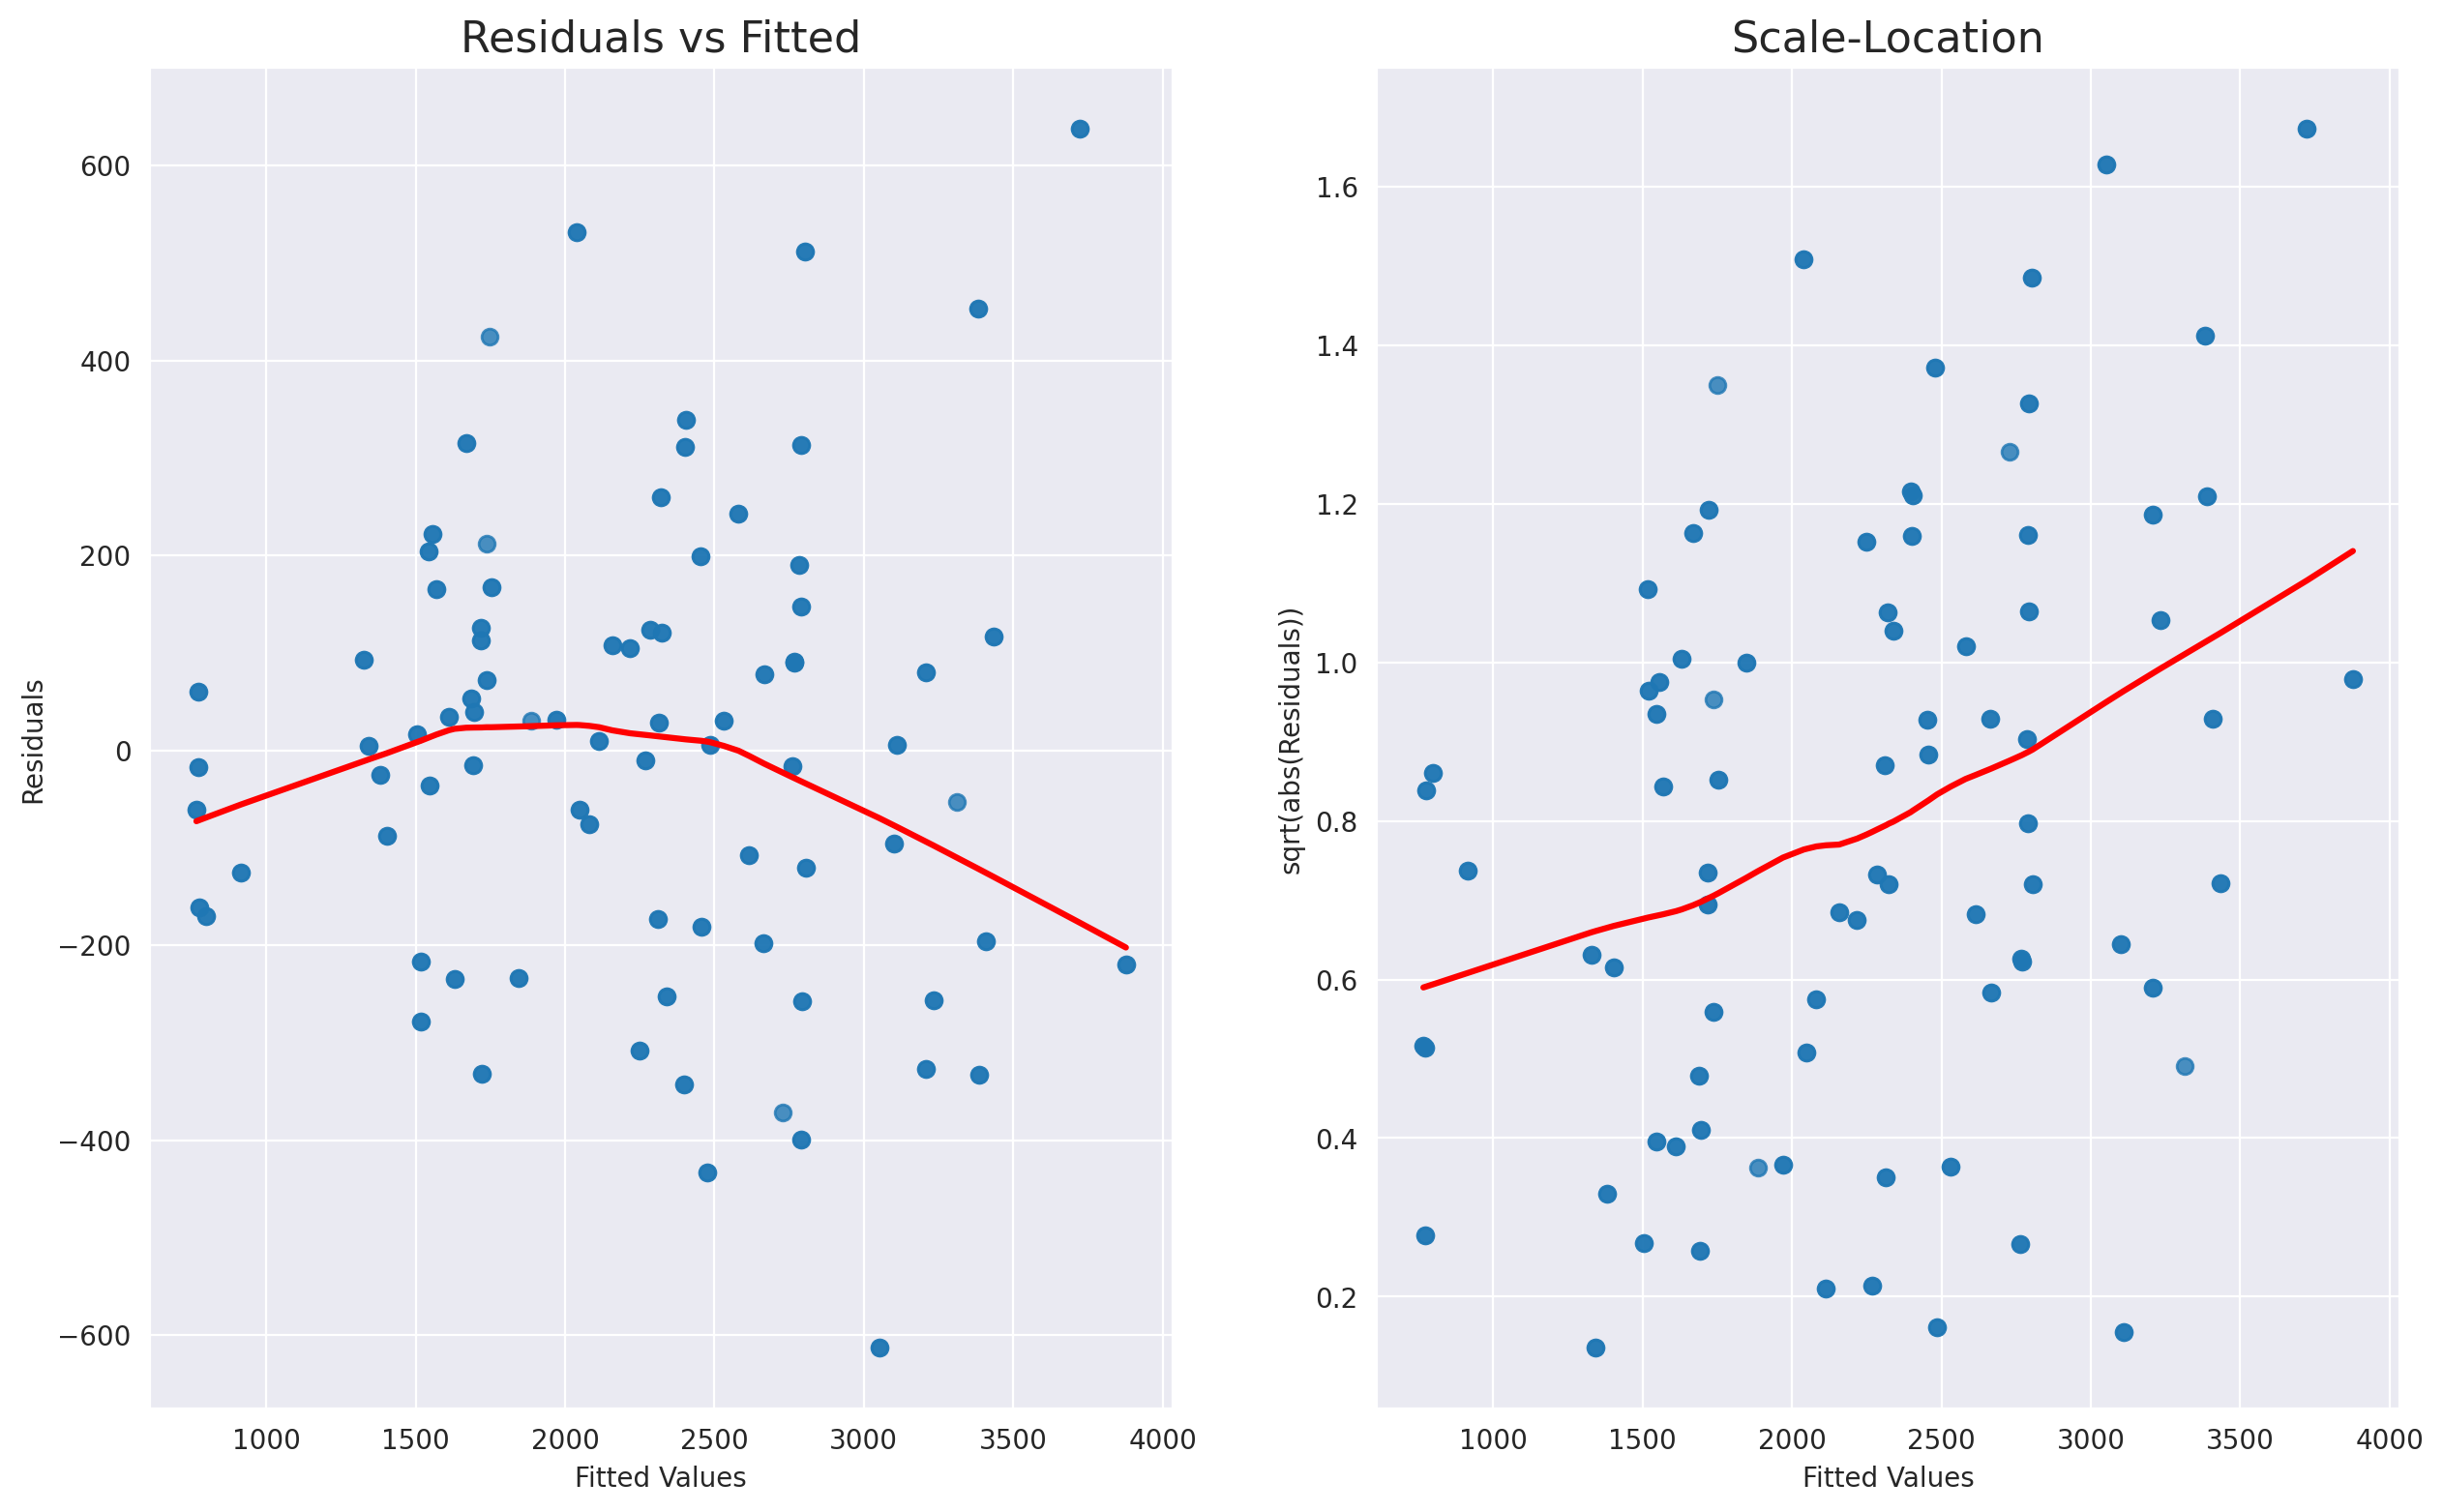

In [33]:
# Define una función para realizar pruebas de homocedasticidad en un modelo de regresión.
def homoscedasticity_test(model):

    # Predice los valores ajustados del modelo.
    fitted_vals = model.predict()
    # Calcula los residuos del modelo.
    resids = model.resid
    # Calcula los residuos estandarizados internamente.
    resids_standardized = model.get_influence().resid_studentized_internal

    # Crea una figura con dos subgráficos.
    fig, ax = plt.subplots(1,2)

    # Grafica los residuos contra los valores ajustados.
    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    # Grafica la raíz cuadrada del valor absoluto de los residuos estandarizados internamente contra los valores ajustados.
    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    # Realiza la prueba de Breusch-Pagan y muestra los resultados.
    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog),
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    # Realiza la prueba de Goldfeld-Quandt y muestra los resultados.
    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    # Imprime los resultados de las pruebas.
    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

# Llama a la función homoscedasticity_test con el modelo previamente ajustado.
homoscedasticity_test(model)




*  En la primer gráfica, la dispersión de los residuos parece aumentar y luego disminuir con los valores ajustados, lo que indica un patrón no aleatorio que sugiere heterocedasticidad, ya que idealmente, si los residuos se distribuyen aleatoriamente alrededor del eje horizontal (residuos = 0), sugeriría que el modelo es adecuado y que las varianzas de los errores son constantes (homocedasticidad).
*  En la segunda gráfica, la línea roja que sube indica que los residuos tienen una tendencia a ser más grandes (ya sea positivos o negativos) a medida que el valor ajustado aumenta. Esto es un indicio de que hay heterocedasticidad presente en el modelo; es decir, la variabilidad de los errores cambia con el nivel del predictor.

**Prueba de Breusch-Pagan:**

* Estadístico de Lagrange Multiplier (LM): El valor de la estadística LM es 36.55492, lo cual es considerablemente alto, lo que sugiere que las varianzas de los residuos están correlacionadas con las variables independientes (heterocedasticidad).
* P-valor: El p-valor asociado es extremadamente bajo (7.354784e-07), lo que indica que se rechaza la hipotesis nula de homocedasticidad.
* F-valor: Este es otro estadístico que proporciona un F-valor alto lo que indica heterocedasticidad.
* P-valor del F-valor: Este p-valor es muy bajo (1.301997e-07), lo que refuerza el rechazo de la hipótesis nula.

La prueba de Breusch-Pagan en su conjunto sugiere fuertemente que los errores no tienen varianza constante y que hay heterocedasticidad en el modelo.

**Prueba de Goldfeld-Quandt:**

* Estadístico F: El valor del estadístico F es 0.665531, lo que indica existencia de heterocedasticidad ya que un valor F significativamente distinto de 1 indica heterocedasticidad.
* P-valor: El p-valor es 0.959421, lo que es muy alto. En la prueba de Goldfeld-Quandt, un p-valor alto sugiere que no hay evidencia suficiente para rechazar la hipótesis nula de que las varianzas son iguales en los diferentes grupos de datos (homocedasticidad).

Por lo tanto, dado que el p-valor es muy alto, no rechazamos la hipótesis nula y concluimos que no hay evidencia suficiente de heterocedasticidad en el modelo según la prueba de Goldfeld-Quandt




## Supuesto de No autocorrelación.

El siguiente supuesto es probar la correlacion entre las variables $Y_{i}$ e $Y_{i-1}$ sea igual a 0. En este supuesto se prueba que $cov(Y_I,Y_{I-1}) = cov(E_I,E_{I-1}) = 0$

Otra interpretacioin que tiene este supuesto es que:
<center> Tenemos que probar que los errores no tenga relacion entre si </center>

*(Pero recuerden; que al ser **V.A.I.I.D.** no debe haber correlación entre los errores)* y con esto veamos que la correlacion de los errores entre los demas con **"Durbin - Watson"** es un test estadistico que nos dice que:

Es una funcion de autorelacion: $ 2(1-a) $, donde $ a $ es la correlación del rezago 1; Consideraciones sobre el estadístoco **DW**:

*   a. el estadístico siempre esta entre los valores 0 y 4
*   b. un valor cercano al 2 indica que no hay correlación en los errores
*   c. un valor $ < 2 $ indica correlación positiva y valor $ > 2 $ correlación negativa.

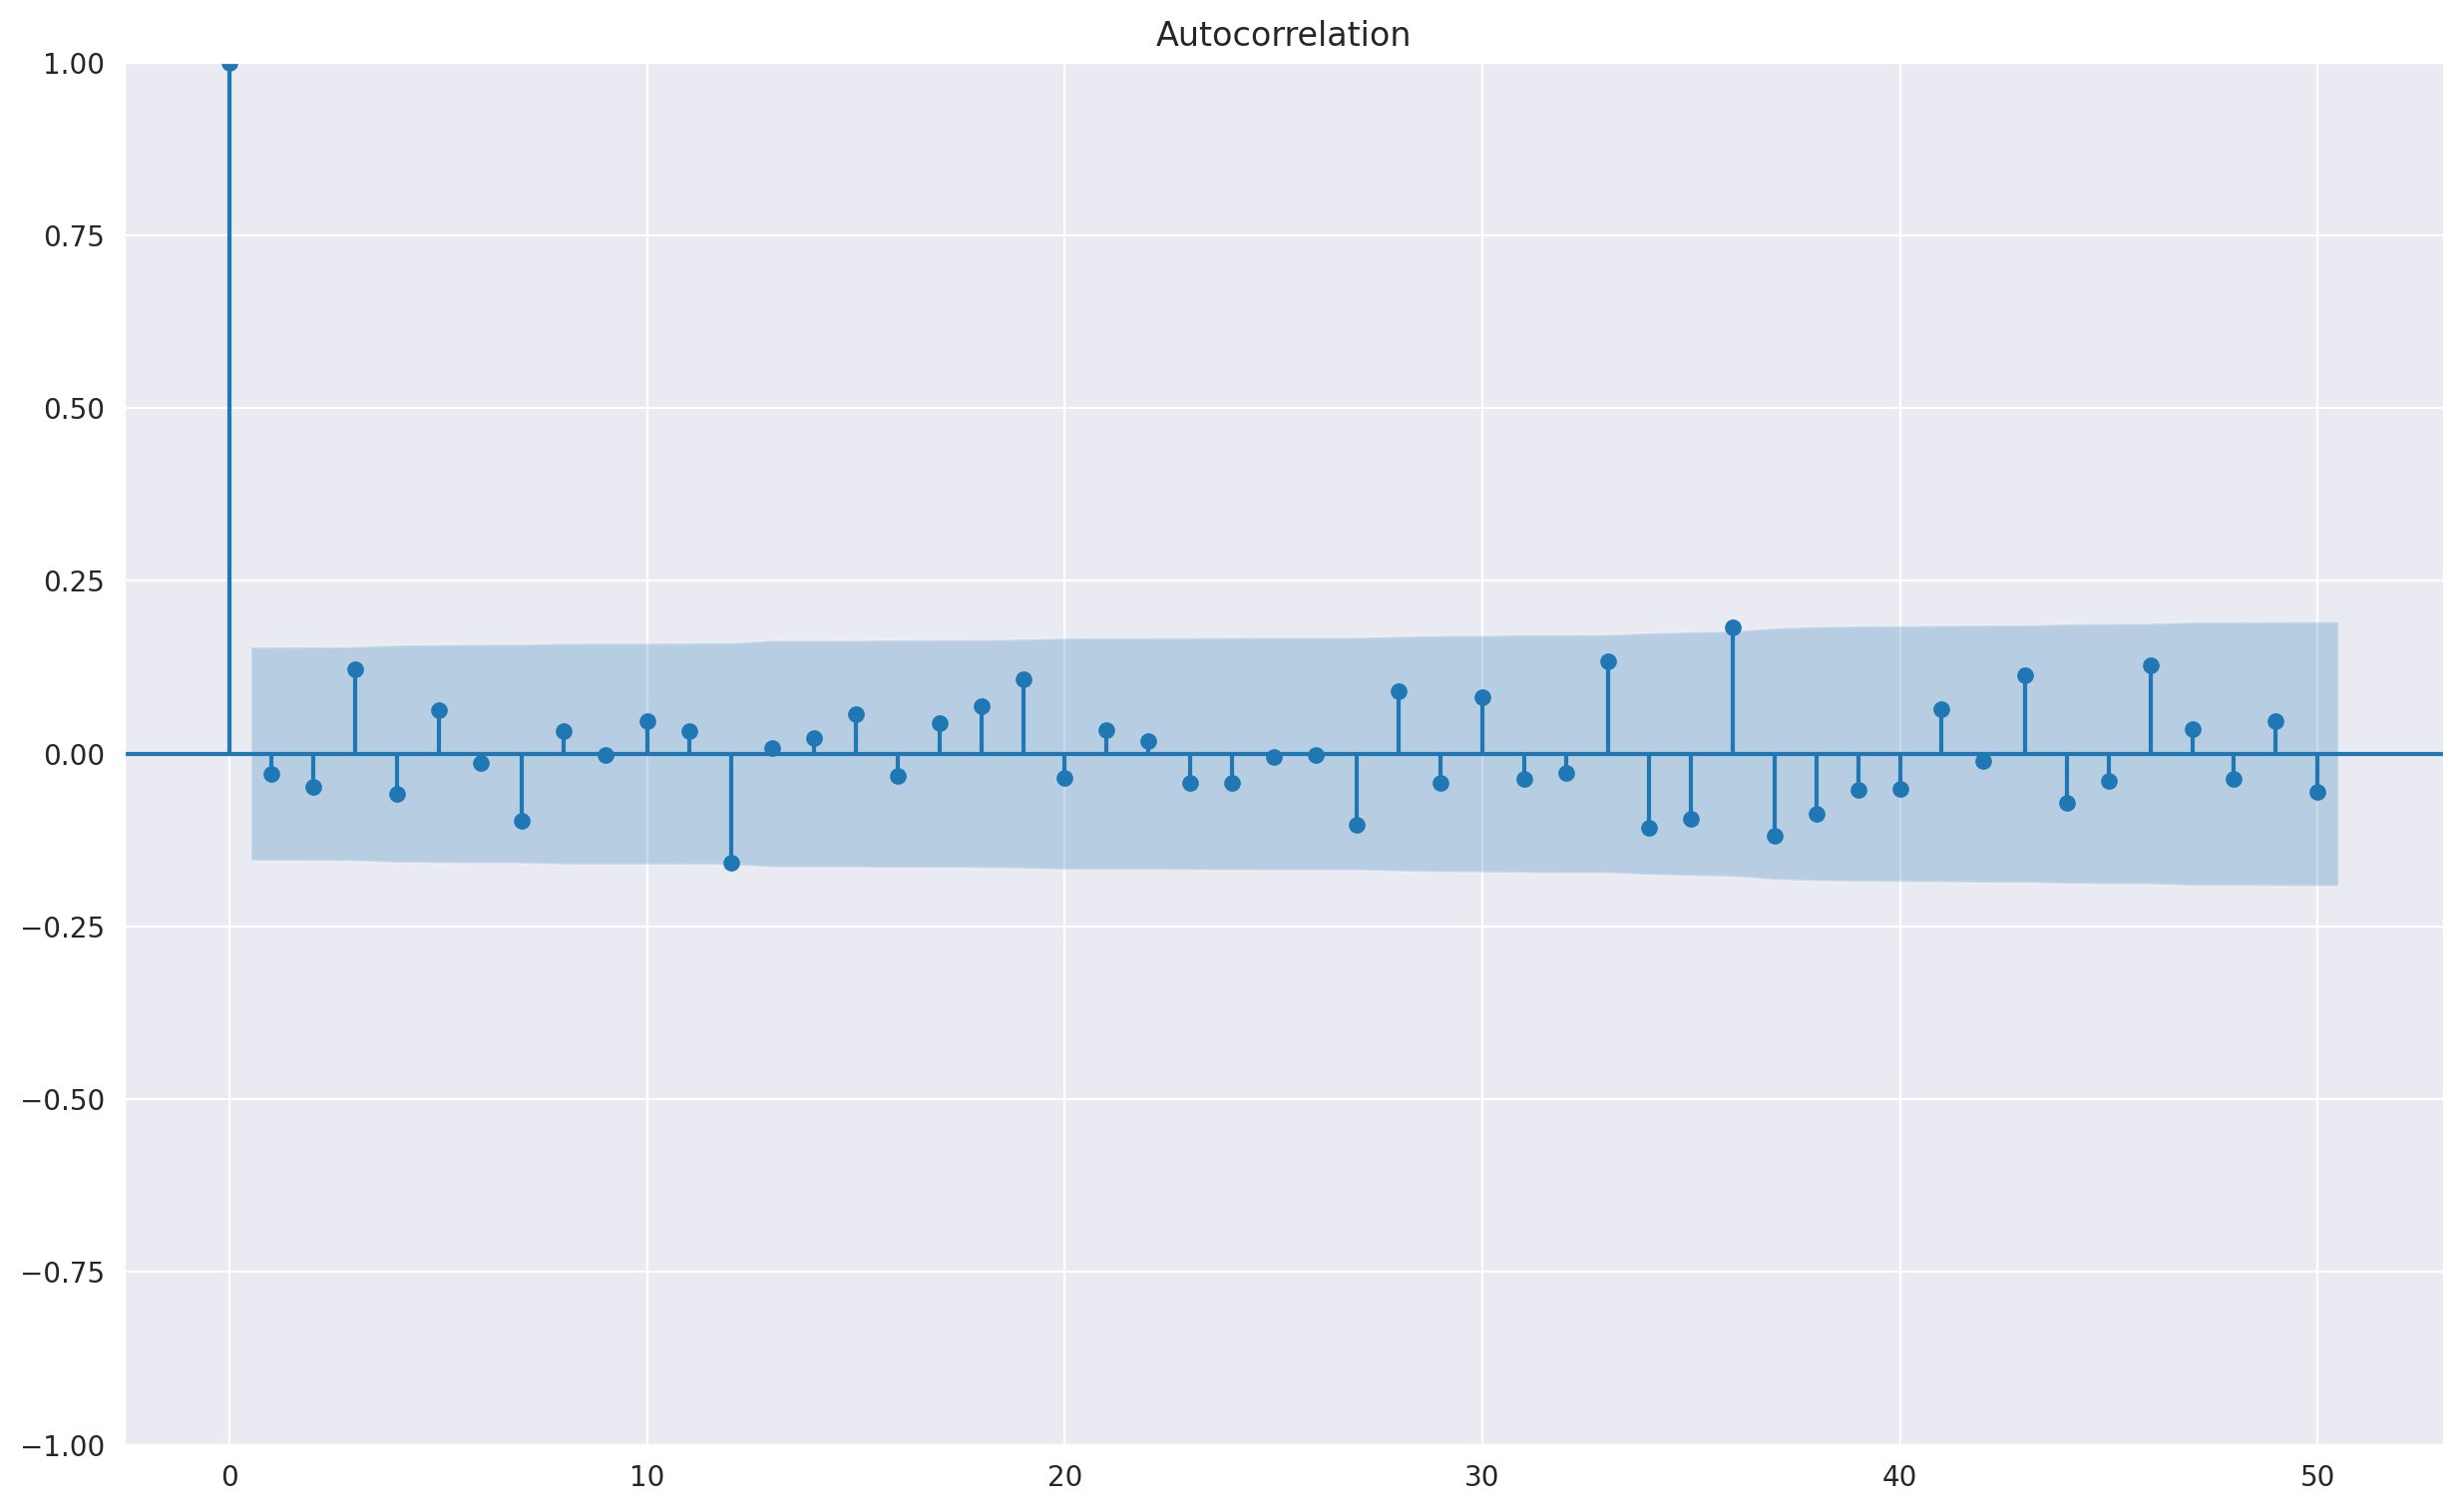

In [34]:
import statsmodels.tsa.api as smt    # Time serial analitic (tsa)

acf = smt.graphics.plot_acf(model.resid, lags=50 , alpha=0.05)      # Aplicamos una grafica con los residuales de la regresion lineal
acf.show()

#Nota: los residuos los calculamos anteriormente (la grafica lo conocemos como un autocorrelorama)

Interpretación del autocorrelograma.
* Es esperado que en el primer rezago de la función de autocorrelación sea igual a 1 ya que es la correlación del rezago cero con el mismo.
* De esta forma podemos observar que después de este primer lag los subsecuentes 49 lags en su mayoría esta contenidos dentro de las las bandas de color azul.
* Formalmente estas bandas sombreadas en color azul representan un intervalo de confianza del 95% para las estimaciones de autocorrelación, en otras palabras los rezagos que superen este intervalo de confianza sugiere que los residuos tendran una autocorrelación.
*En resumen el autocorrelograma presentado parece indicar que no hay problemas de autocorrelación entre los residuos ya que solo el lag número 13 y el número 37 son los únicos que apenas estan tocando o sobrepasando el intervalo de confianza del 95%, pero al tratarse de solo 2 rezagos que estan muy cercanos a estar dentro del intervalo no representan un problema de autocorrelación que necesite tratamiento.

En este caso en la prueba de *Durbin - Watson* nos refleja un valor de *2.036*, lo cual es muy buen indicador ya que es un valor cercano al 2 el cual indica que no hay correlación en los errores lo cual coincide con el análisis del autocorrelograma.



## Supuesto de Relacio de X y los residuos

Este supuesto nos da la garantia de que nuestro modelo de regresion multiple esta captando la relacion entre las V.A.s independientes y la V.A objetivo.

En esta parte de ve esta correlacion por medio de la correlacion de Pearson enter cada V.A independiente y los residuo generados de la regresion y si lo hacemos entre todas la V.A.s del dataframe vemos los siguiente:

In [35]:
from scipy.stats.stats import pearsonr      # traemos la funcion de Pearson

for column in X.columns:          # Aplicamos una "for" para que haga la correlacion entre V.A.s y los residuos
    corr_test = pearsonr(X[column], model.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: weight --- correlation: 0.0000, p-value: 1.0000
Variable: resoloution --- correlation: 0.0290, p-value: 0.7151
Variable: ppi --- correlation: 0.1849, p-value: 0.0189
Variable: cpu_core --- correlation: 0.0000, p-value: 1.0000
Variable: cpu_freq --- correlation: 0.0000, p-value: 1.0000
Variable: internal_mem --- correlation: 0.1771, p-value: 0.0246
Variable: ram --- correlation: 0.0000, p-value: 1.0000
Variable: RearCam --- correlation: 0.0661, p-value: 0.4046
Variable: Front_Cam --- correlation: 0.0000, p-value: 1.0000
Variable: battery --- correlation: 0.1162, p-value: 0.1420


<ipython-input-35-aeec2c6508f7>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr      # traemos la funcion de Pearson


algunas V.A.s tiende a que exista una relacion con los residuos y otra que existe practicamente no lo tiene *(que coincidentemente son las 5 V.As que habiamos seleccionado para hacer un buen modelo)*. El P-Value es la probabilidad de que la correlacion sea cero *(esto se deriva de un prueba de hipotesis)* y si nos fijas en las 5 V.A.s .....

In [36]:
from scipy.stats.stats import pearsonr      # traemos la funcion de Pearson

X1 = sales[['weight', 'cpu_core', 'cpu_freq', 'ram', 'Front_Cam']]

for column in X1.columns:          # Aplicamos una "for" para que haga la correlacion entre V.A.s  y los residuos
    corr_test = pearsonr(X1[column], model.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

#### Python realiza una prueba de hipótesis sobre la función de pearson

Variable: weight --- correlation: 0.0000, p-value: 1.0000
Variable: cpu_core --- correlation: 0.0000, p-value: 1.0000
Variable: cpu_freq --- correlation: 0.0000, p-value: 1.0000
Variable: ram --- correlation: 0.0000, p-value: 1.0000
Variable: Front_Cam --- correlation: 0.0000, p-value: 1.0000


<ipython-input-36-0635667c47de>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr      # traemos la funcion de Pearson


Podemos decir que si cumple este supuesto de manera correcta.

## Supuesto de Test de Varianza

Otro test a tener en cuenta es ver la varianza de nuestras V.A.s independientes
que tenga un comportamiento similar entre ellas...

Para este ocasion haremos uso del **coeficiente de dispersion** que es aceptable para este supuesto. Este termino se trata de: $ \sigma / \mu $ que nos da cada una de las V.A.s y notemos que si lo cumple entre estas V.A.s, cumpliendo el supuesto.

In [37]:
media = np.std (X1, axis = 0)     # Calculamos la media
des_est = np.mean (X1, axis = 0)  # Calculamos la desviacion estandar

Coef_Dis = des_est / media        # Calculamos el coeficiente
Coef_Dis

weight       1.840461
cpu_core     1.993562
cpu_freq     2.513446
ram          1.373978
Front_Cam    1.040327
dtype: float64

## Supuesto de la Normalidad de los residuos

Veamos el otro supuesto de normalidad de los residuos **(e ~ N(0,Sigma))**. No poner a atención a esta situación nos va acarreando problemas en la estimación.

Construimos función para probar la normalidad en los errores por medio de una función para dibujar **"el gráfico QQ (Cuartil por Cuartil)"** normal de los residuos y ejecutar 4 pruebas estadísticas para
     Investigar la normalidad de los residuos.

El Q-Q plot  se utiliza para verificar si los residuos de un modelo de regresión siguen una distribución normal.
     argumento:
     * modelo: modelos OLS ajustados de statsmodels

In [38]:
from scipy import stats     # importamos la paqueteria "scipy" para analisis de datos

def normality_of_residuals_test(model):           # creamos una funcion para usarlo despues

    sm.ProbPlot(model.resid).qqplot(line='s');       # Creamos la grafica QQ de esta forma
    plt.title('Q-Q plot');

    # Ejecutamos  algunos estadisticos de Pruebas de Hipotesis (algunos lo vemos en el summery de nuestra regresion) sobre los residuos de nuestra regresion

    jb = stats.jarque_bera(model.resid)      # Jarque-Bera
    sw = stats.shapiro(model.resid)       # Shapiro-Wilk
    ad = stats.anderson(model.resid, dist='norm')   # Anderson-Darling
    ks = stats.kstest(model.resid, 'norm')      # Kolmogorov-Smirnov

    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')      # imprimimos los resultados anteriores de esta forma
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')

Jarque-Bera test ---- statistic: 2.9084, p-value: 0.23358974013746267
Shapiro-Wilk test ---- statistic: 0.9855, p-value: 0.0932
Kolmogorov-Smirnov test ---- statistic: 0.5005, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.5771, 5% critical value: 0.7690
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


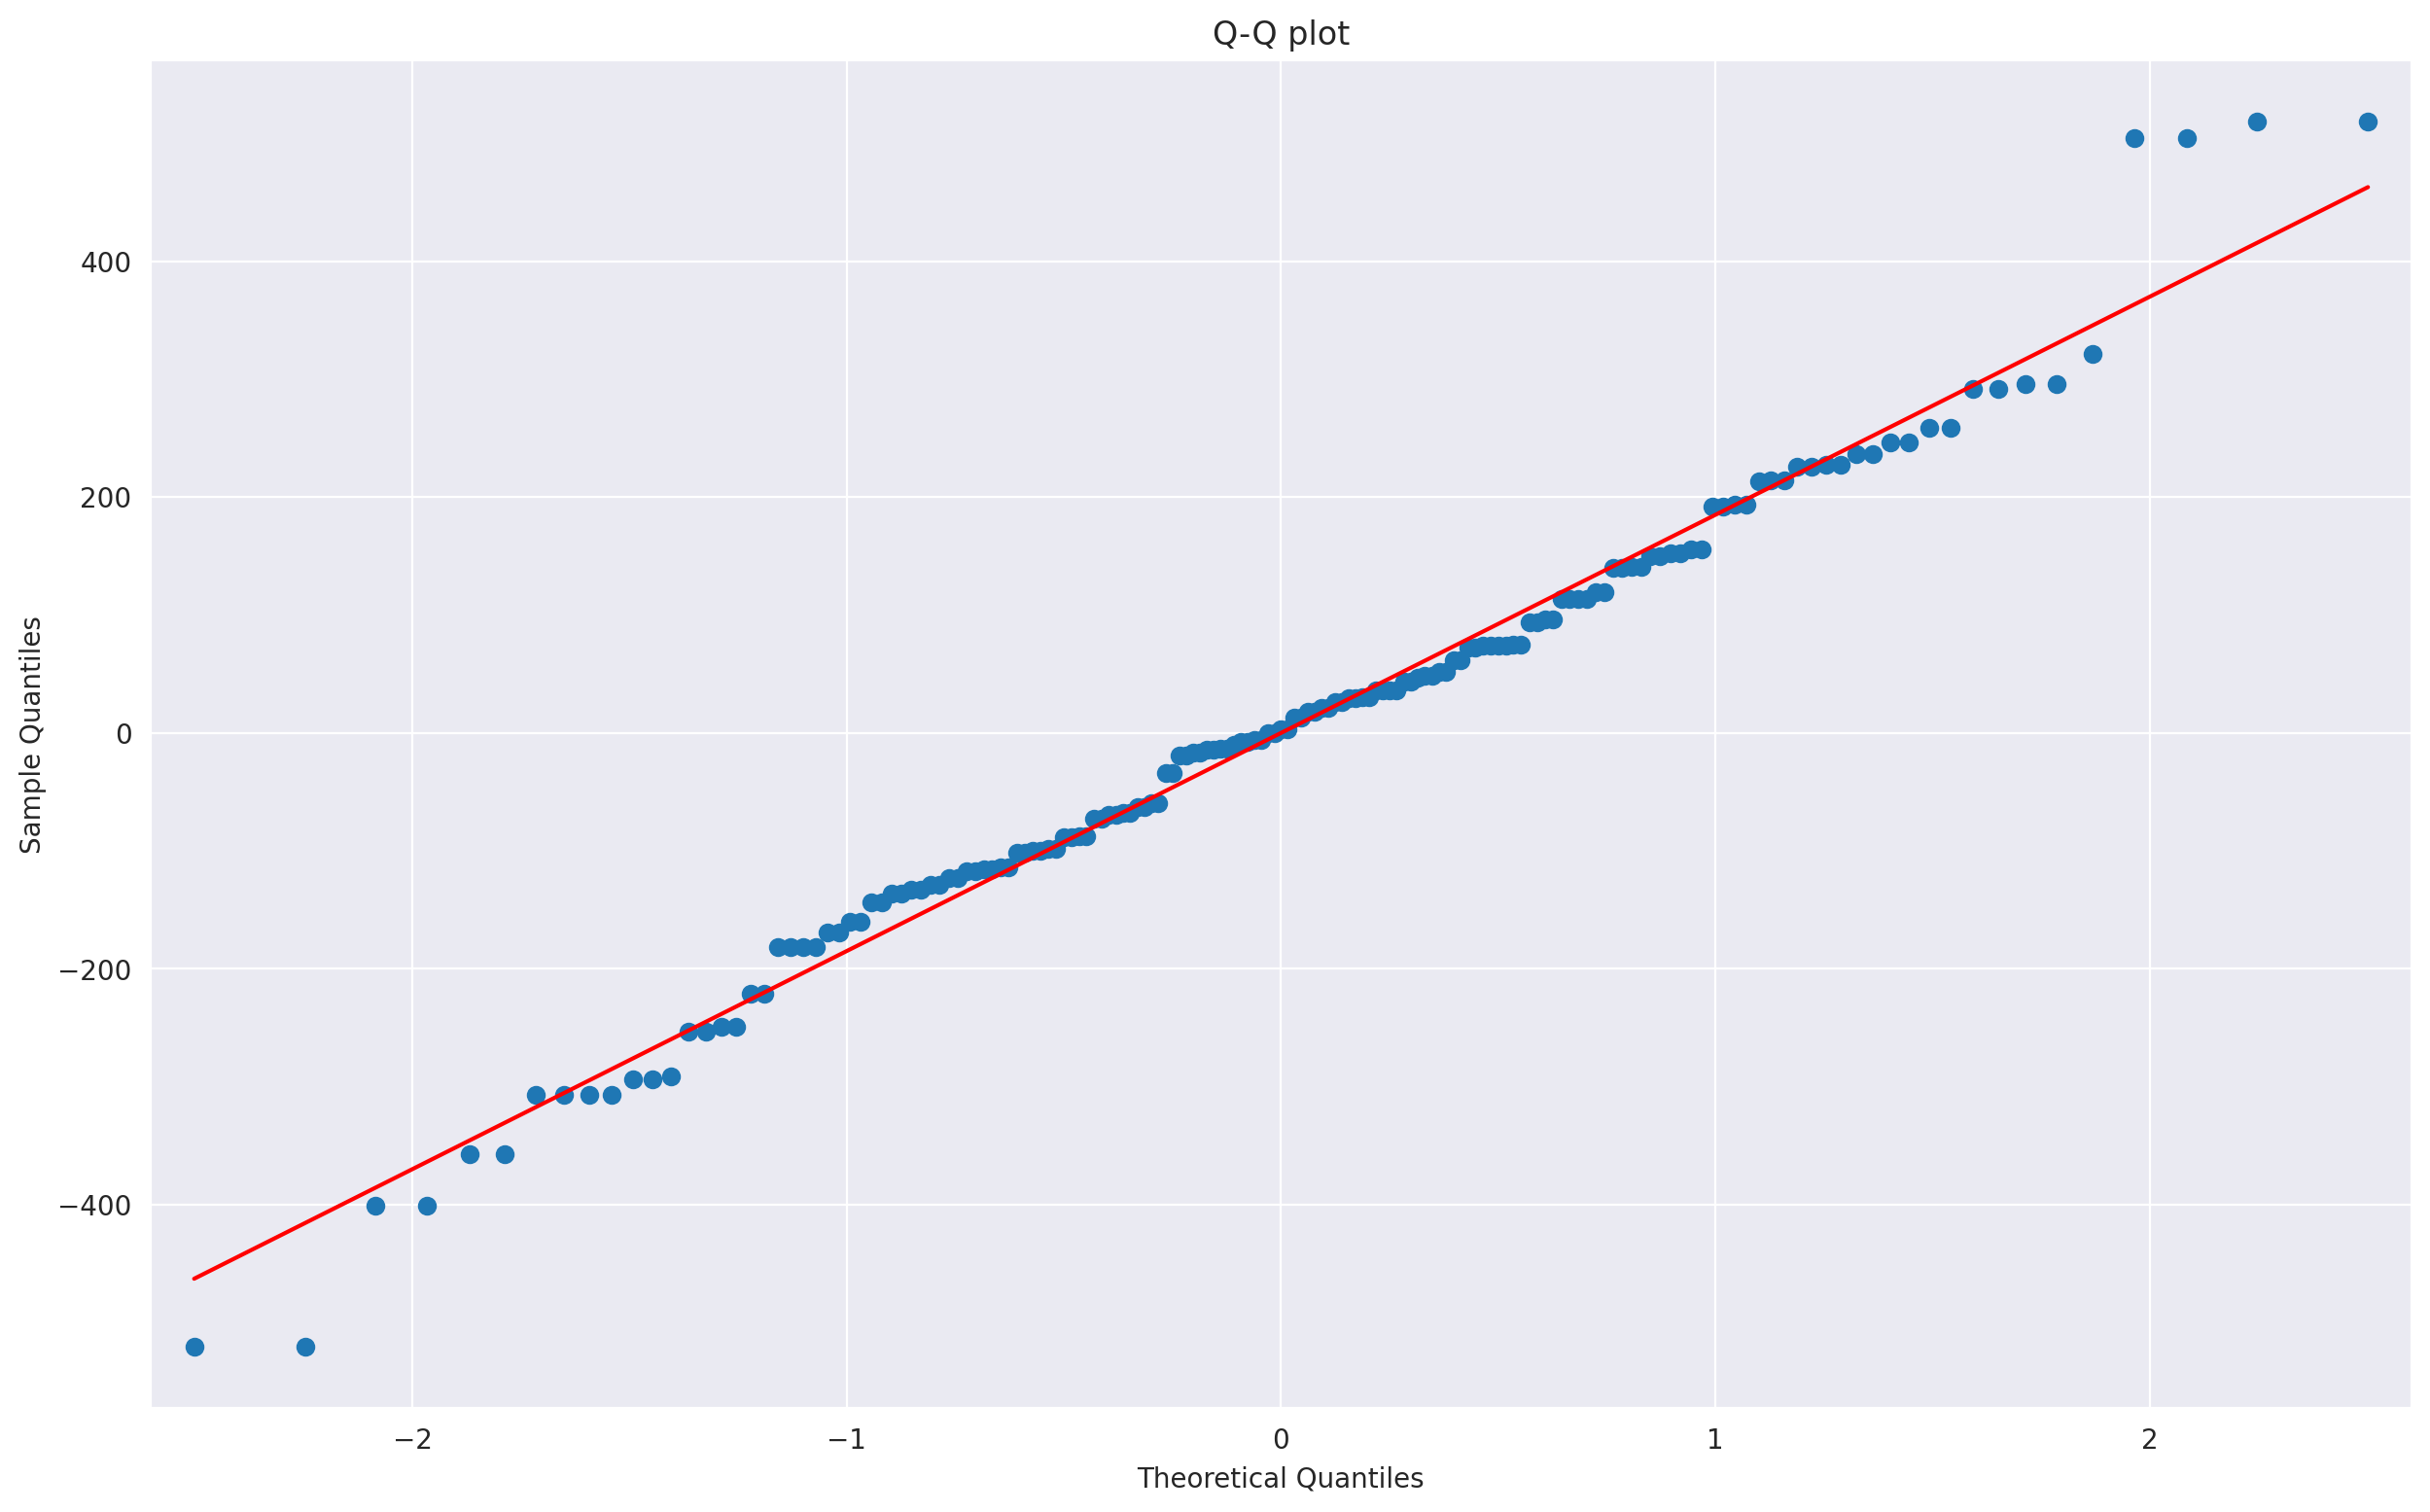

In [39]:
normality_of_residuals_test(lin_reg)      # ejecutamos la funcion sobre nuestra regresion

En el caso de los estadisticos tiene la siguiente explicacion:

*   **JB**: nos indica la normalidad de nuestro residuos.
En este caso, nos arrojó que nuestra Estadística: 2.9084 y el p-valor es 0.2336, lo cual es mayor que 0.05, lo que sugiere que los residuos podrían seguir una distribución normal.

*   **SW**: nos indica la autocorrelacion entre los valores del residuo.
Aquí, Un p-valor mayor que 0.05 indica que los datos podrían ser normales.En este caso, el p-valor es 0.0932, lo que también sugiere que los residuos pueden seguir una distribución normal.

*   **AD**: esta es una extencion del estadistico siguiente.
Para esta prueba, si la estadística de prueba es mayor que el valor crítico, se rechaza la hipótesis nula de normalidad.
En este caso, la estadística de prueba (0.5771) es menor que el valor crítico (0.7690), lo que sugiere que los residuos pueden seguir una distribución normal.

*   **KS**: nos ayuda a ver si una distribucion acumulada se parece a otra atravez de hacer una pruba de hipotesis de "la diferencia maxima" entre las 2 distribuciones anteriores con h0 = 0   $~~~~$   H1 < 20% (de preferencia)
En este caso, un p-valor menor que 0.05 sugiere que los datos no son normales.
aquí, el p-valor es 0.0000, lo que indica que los residuos no son normales según esta prueba.

En conclusión, tres de las cuatro pruebas (Jarque-Bera, Shapiro-Wilk, y Anderson-Darling) sugieren que los residuos podrían seguir una distribución normal, mientras que el Kolmogorov-Smirnov test sugiere lo contrario. Dado que la mayoría de las pruebas indican normalidad, parece razonable suponer que los residuos siguen una distribución normal, aunque el resultado del Kolmogorov-Smirnov test puede requerir más investigación.

Analizando también nuestro Q-Q plot explorado, podemos ver que los puntos(la comparación de nuestro cuantil empírico y el cuantil teórico) se encuentran muy cerca de nuestra linea roja, lo cual, nos indica que es un "buen modelo" ya que siguen una distribución normal.

# Conclusiones.

Dado a los resultados que nos arrojo los supuestos anteriores podemos decir que es una modelo aceptable dado que a pesar de que las V.A. **Front_Cam** nos es significativa (a vista del summery) y con **el fallo del supuesto de homocesdasticidad**; eso no quita que el $R^2$ nos arroje un .909 indicando un buen modelo y con el cumplimiento el resto de los supuestos.

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     310.8
Date:                Fri, 19 Apr 2024   Prob (F-statistic):           7.54e-79
Time:                        01:50:10   Log-Likelihood:                -1104.4
No. Observations:                 161   AIC:                             2221.
Df Residuals:                     155   BIC:                             2239.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    803.5919     58.079     13.836      0.0